In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('../data/consolidated_data/all_malaysia.csv') 
df_vaccine = pd.read_csv('../data/vaccination/vax_malaysia.csv')
df_state = pd.read_csv('../data/consolidated_data/eda_dataset.csv')

In [3]:
df_vaccine['date'] = pd.to_datetime(df_vaccine['date'])
df_state['date'] = pd.to_datetime(df_state['date'])

In [4]:
df_state

,Unnamed: 0,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_unvax,cases_pvax,cases_fvax,...,cases_new_cumul,deaths_new_dod_cumul,daily_cumul,daily_full_cumul,rtk-ag_x_cumul,pcr_x_cumul,astra_cumul,pfizer_cumul,sinopharm_x_cumul,sinovac_cumul
0,0,2020-01-25,Johor,4,4,0,4,4,0,0,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2020-01-25,Kedah,0,0,0,0,0,0,0,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2020-01-25,Kelantan,0,0,0,0,0,0,0,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2020-01-25,Melaka,0,0,0,0,0,0,0,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2020-01-25,Negeri Sembilan,0,0,0,0,0,0,0,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24763,24763,2024-04-20,Selangor,39,0,8,37,4,0,8,...,5279819,37349.0,72654837.0,27550991.0,38841950.0,13900557.0,5707686.0,45063055.0,44306.0,21592494.0
24764,24764,2024-04-20,Terengganu,0,0,0,299,0,0,0,...,5279819,37349.0,72654837.0,27550991.0,38841950.0,13900557.0,5707686.0,45063055.0,44306.0,21592494.0
24765,24765,2024-04-20,W.P. Kuala Lumpur,33,0,5,585,6,0,3,...,5279852,37349.0,72654840.0,27550991.0,38841950.0,13900557.0,5707686.0,45063055.0,44306.0,21592497.0
24766,24766,2024-04-20,W.P. Labuan,0,0,0,28,0,0,0,...,5279852,37349.0,72654840.0,27550991.0,38841950.0,13900557.0,5707686.0,45063055.0,44306.0,21592497.0


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df = df.drop(columns=['Unnamed: 0', "Unnamed: 0.1"])

In [7]:
df.dtypes

date                        object
cases_new                    int64
cases_import                 int64
cases_recovered              int64
cases_active                 int64
cases_cluster                int64
cases_unvax                  int64
cases_pvax                   int64
cases_fvax                   int64
cases_boost                  int64
cases_child                  int64
cases_adolescent             int64
cases_adult                  int64
cases_elderly                int64
cases_0_4                    int64
cases_5_11                   int64
cases_12_17                  int64
cases_18_29                  int64
cases_30_39                  int64
cases_40_49                  int64
cases_50_59                  int64
cases_60_69                  int64
cases_70_79                  int64
cases_80                     int64
cluster_import             float64
cluster_religious          float64
cluster_community          float64
cluster_highRisk           float64
cluster_education   

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.dtypes

date                       datetime64[ns]
cases_new                           int64
cases_import                        int64
cases_recovered                     int64
cases_active                        int64
cases_cluster                       int64
cases_unvax                         int64
cases_pvax                          int64
cases_fvax                          int64
cases_boost                         int64
cases_child                         int64
cases_adolescent                    int64
cases_adult                         int64
cases_elderly                       int64
cases_0_4                           int64
cases_5_11                          int64
cases_12_17                         int64
cases_18_29                         int64
cases_30_39                         int64
cases_40_49                         int64
cases_50_59                         int64
cases_60_69                         int64
cases_70_79                         int64
cases_80                          

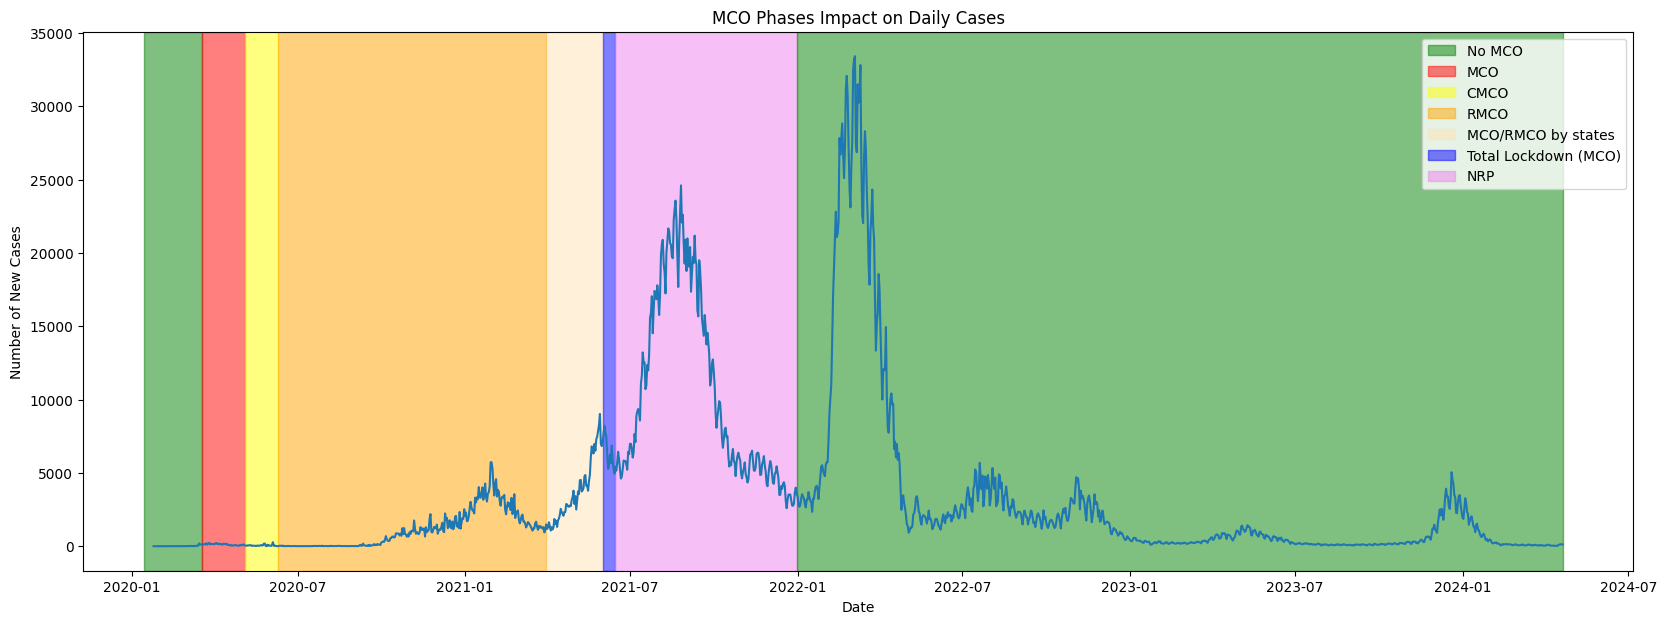

In [10]:
plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Daily Cases")
plt.plot(df["date"], df["cases_new"])
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

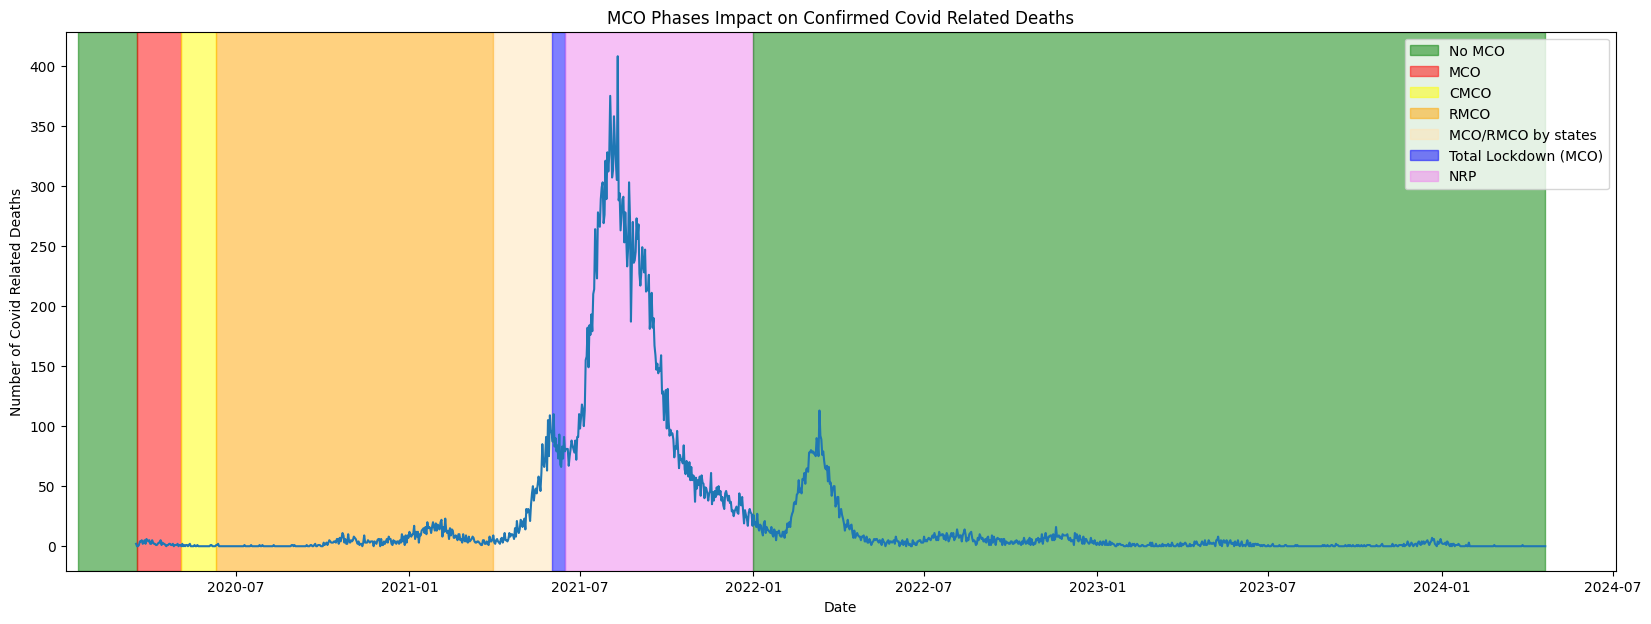

In [11]:
plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Confirmed Covid Related Deaths")
plt.plot(df["date"], df["deaths_new_dod"])
plt.xlabel("Date")
plt.ylabel("Number of Covid Related Deaths")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

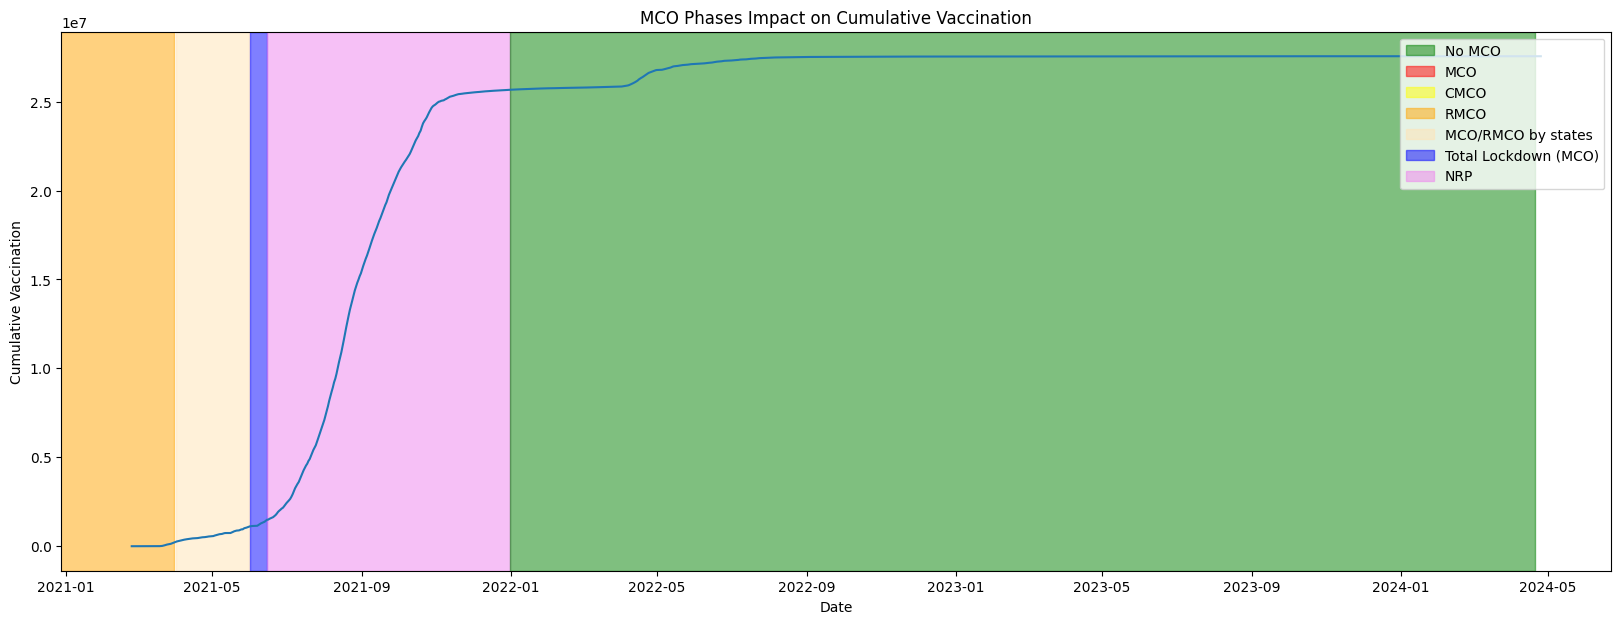

In [12]:
plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Cumulative Vaccination")
plt.plot(df_vaccine["date"], df_vaccine["daily_full"].cumsum())
plt.xlabel("Date")
plt.ylabel("Cumulative Vaccination")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

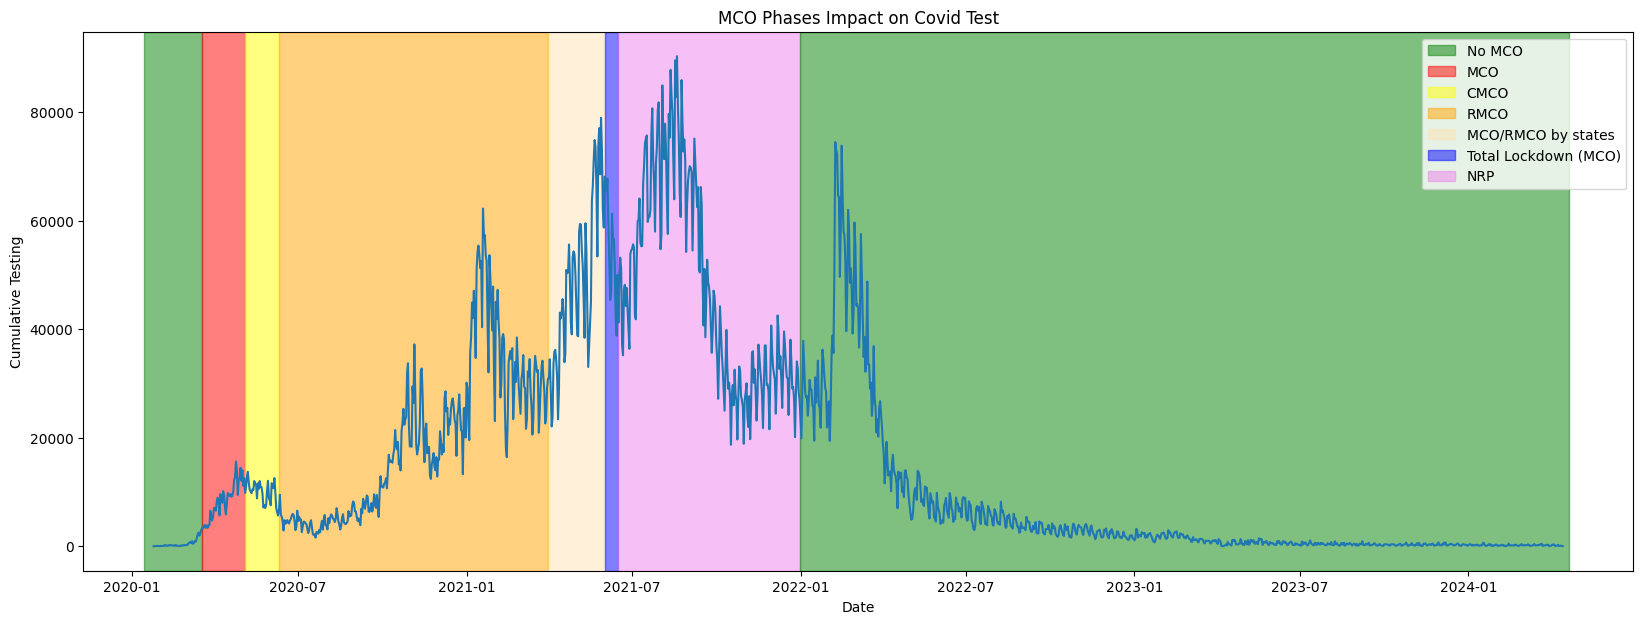

In [13]:
df['total_tests'] = df["pcr"]+df["rtk-ag"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Covid Test")
plt.plot(df["date"], df["pcr"])
plt.xlabel("Date")
plt.ylabel("Cumulative Testing")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

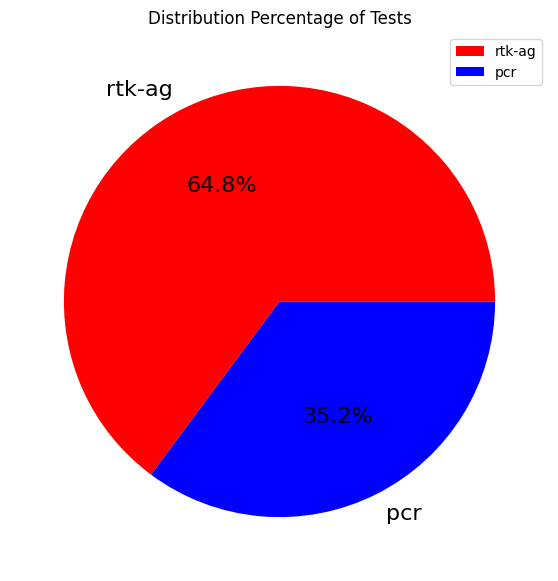

In [14]:
tests_value = [df["rtk-ag"].sum(), df["pcr"].sum()]
tests_total = sum(tests_value)
tests_percentage = [(tests_value[0]/tests_total)*100, (tests_value[1]/tests_total)*100]

labels = ["rtk-ag", "pcr"]
colours = ["red", "blue"]

plt.figure(figsize=(7,7))
plt.title("Distribution Percentage of Tests")
plt.pie(tests_percentage, labels=labels, colors=colours, autopct="%1.1f%%", textprops={"fontsize": 16})

plt.legend(loc="upper right")

plt.show()

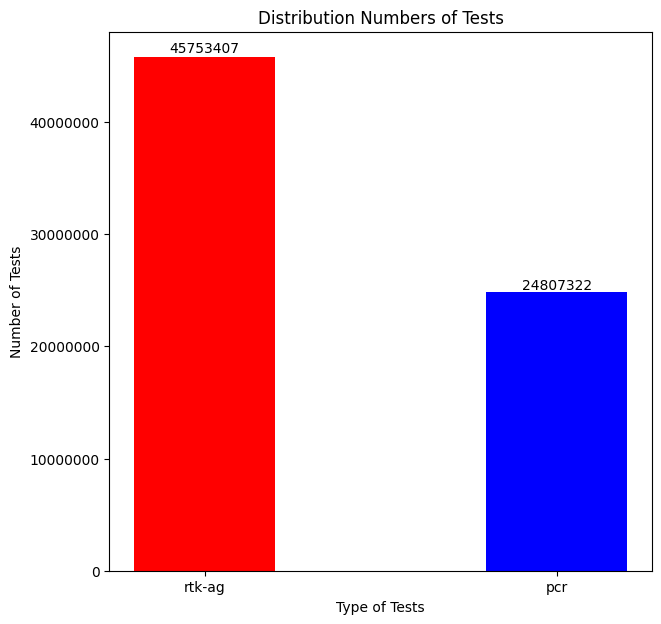

In [15]:
tests_value = [df["rtk-ag"].sum(), df["pcr"].sum()]

labels = ["rtk-ag", "pcr"]
colours = ["red", "blue"]

plt.figure(figsize=(7,7))
plt.title("Distribution Numbers of Tests")
plt.ylabel("Number of Tests")
plt.xlabel("Type of Tests")
plt.bar(labels, tests_value, color=colours, width = 0.4)

for i, value in enumerate(tests_value):
    plt.text(i, value*1.01, f'{value:.0f}', ha='center', va='baseline')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()

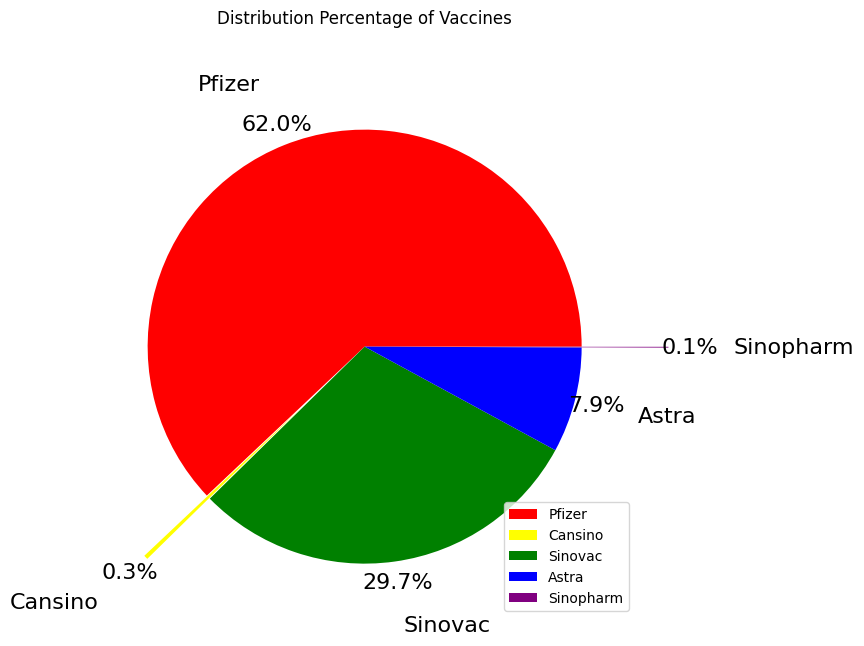

In [16]:
vaccine_value = [df_vaccine["pfizer1"].sum()+df_vaccine["pfizer2"].sum()+df_vaccine["pfizer3"].sum()+df_vaccine["pfizer4"].sum(),
                 df_vaccine["cansino"].sum()+df_vaccine["cansino3"].sum()+df_vaccine["cansino4"].sum(),
                 df_vaccine["sinovac1"].sum()+df_vaccine["sinovac2"].sum()+df_vaccine["sinovac3"].sum()+df_vaccine["sinovac4"].sum(),
                 df_vaccine["astra1"].sum()+df_vaccine["astra2"].sum()+df_vaccine["astra3"].sum()+df_vaccine["astra4"].sum(),
                 df_vaccine["sinopharm1"].sum()+df_vaccine["sinopharm2"].sum()+df_vaccine["sinopharm3"].sum()+df_vaccine["sinopharm4"].sum()]
vaccine_total = sum(vaccine_value)
vaccine_percentage = [(vaccine_value[0]/vaccine_total)*100, (vaccine_value[1]/vaccine_total)*100, (vaccine_value[2]/vaccine_total)*100,
                     (vaccine_value[3]/vaccine_total)*100, (vaccine_value[4]/vaccine_total)*100]

labels = ["Pfizer","Cansino", "Sinovac", "Astra", "Sinopharm"]
colours = ["red", "yellow", "green", "blue", "purple"]
explode = [0, 0.4, 0, 0, 0.4]

plt.figure(figsize=(7,10))
plt.title("Distribution Percentage of Vaccines", y=1.08)
plt.pie(vaccine_percentage, labels=labels, colors=colours, autopct="%1.1f%%", pctdistance=1.1, labeldistance=1.3, explode=explode, textprops={"fontsize": 16})

plt.legend(loc="lower right")

plt.show()

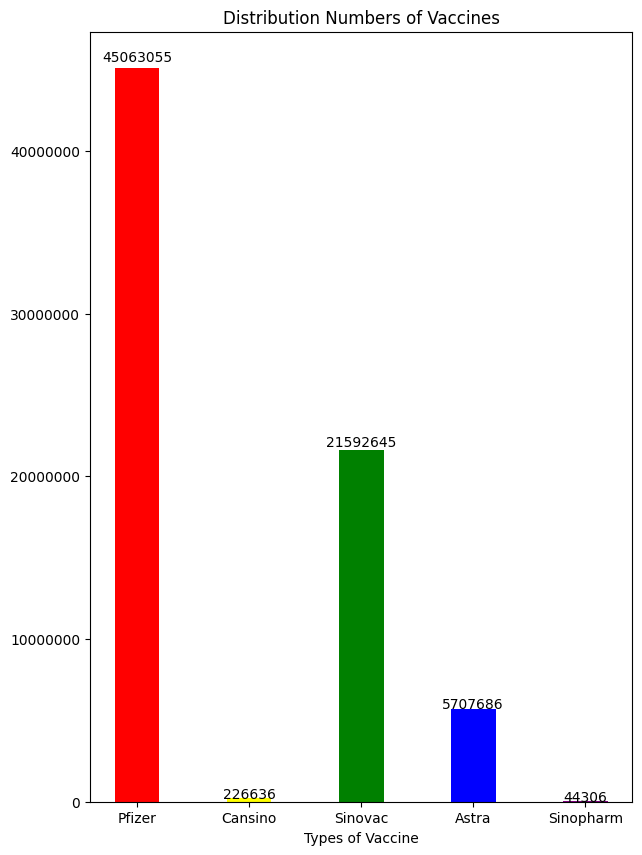

In [17]:
vaccine_value = [df_vaccine["pfizer1"].sum()+df_vaccine["pfizer2"].sum()+df_vaccine["pfizer3"].sum()+df_vaccine["pfizer4"].sum(),
                 df_vaccine["cansino"].sum()+df_vaccine["cansino3"].sum()+df_vaccine["cansino4"].sum(),
                 df_vaccine["sinovac1"].sum()+df_vaccine["sinovac2"].sum()+df_vaccine["sinovac3"].sum()+df_vaccine["sinovac4"].sum(),
                 df_vaccine["astra1"].sum()+df_vaccine["astra2"].sum()+df_vaccine["astra3"].sum()+df_vaccine["astra4"].sum(),
                 df_vaccine["sinopharm1"].sum()+df_vaccine["sinopharm2"].sum()+df_vaccine["sinopharm3"].sum()+df_vaccine["sinopharm4"].sum()]

labels = ["Pfizer","Cansino", "Sinovac", "Astra", "Sinopharm"]
colours = ["red", "yellow", "green", "blue", "purple"]

plt.figure(figsize=(7,10))
plt.title("Distribution Numbers of Vaccines")
plt.xlabel("Types of Vaccine")
plt.bar(labels, vaccine_value, color=colours, width = 0.4)

for i, value in enumerate(vaccine_value):
    plt.text(i, value*1.01, f'{value:.0f}', ha='center', va='baseline')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()

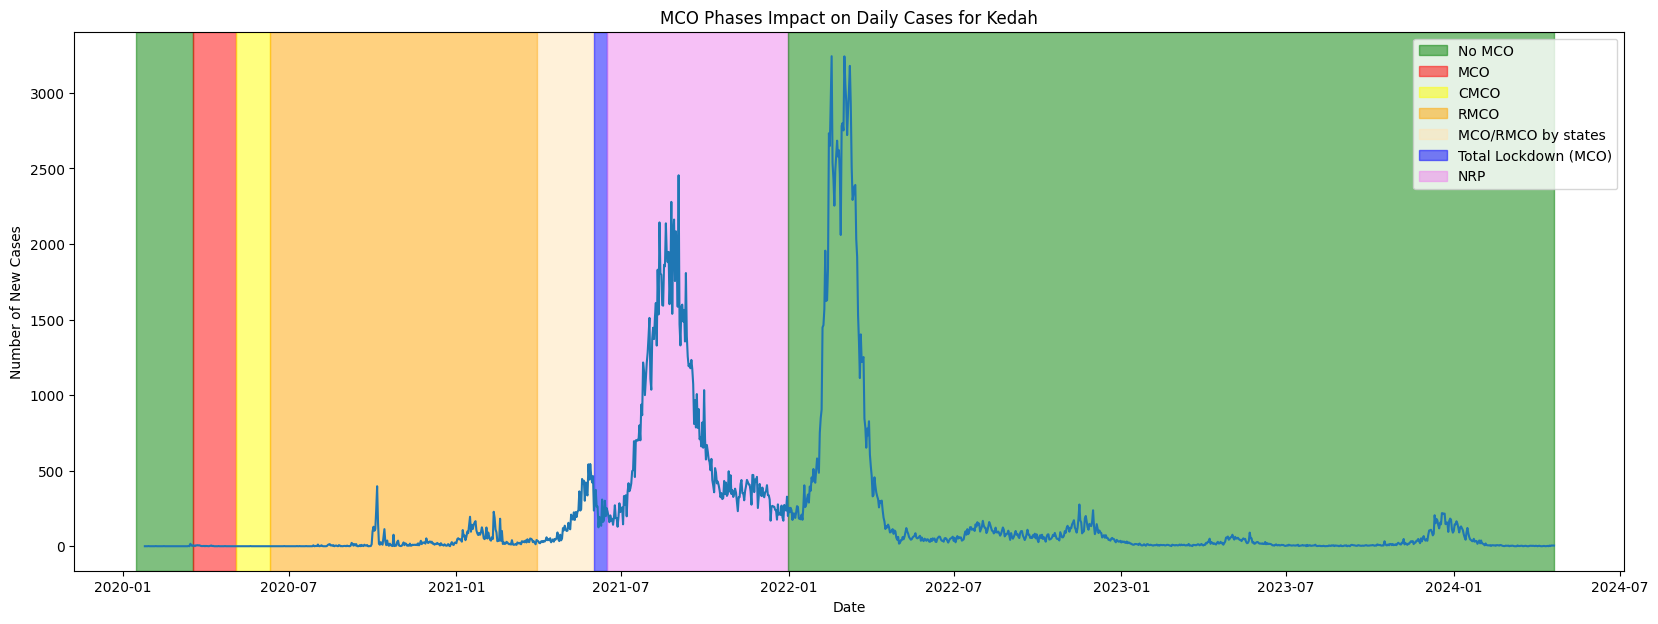

In [20]:
df_kedah = df_state[df_state["state"] == "Kedah"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Daily Cases for Kedah")
plt.plot(df_kedah["date"], df_kedah["cases_new"])
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

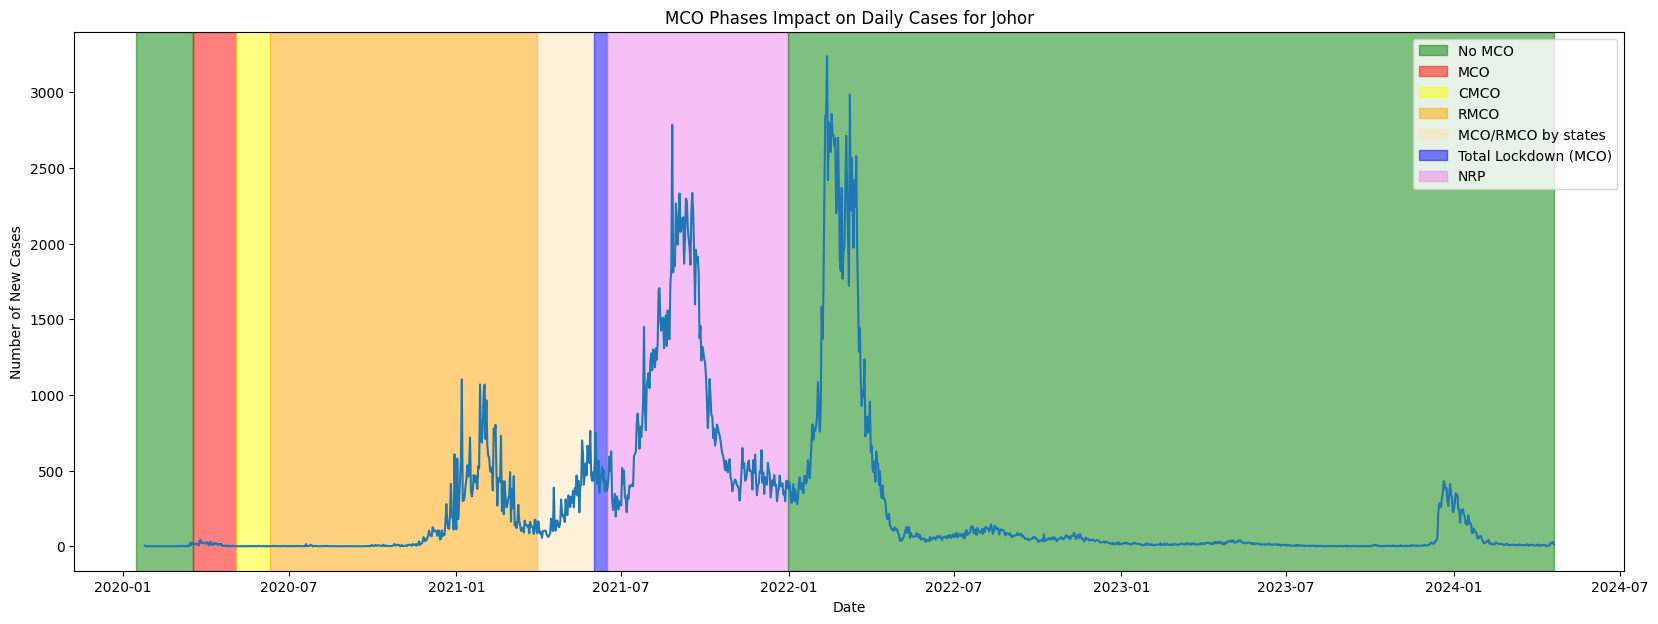

In [21]:
df_johor = df_state[df_state["state"] == "Johor"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Daily Cases for Johor")
plt.plot(df_johor["date"], df_johor["cases_new"])
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

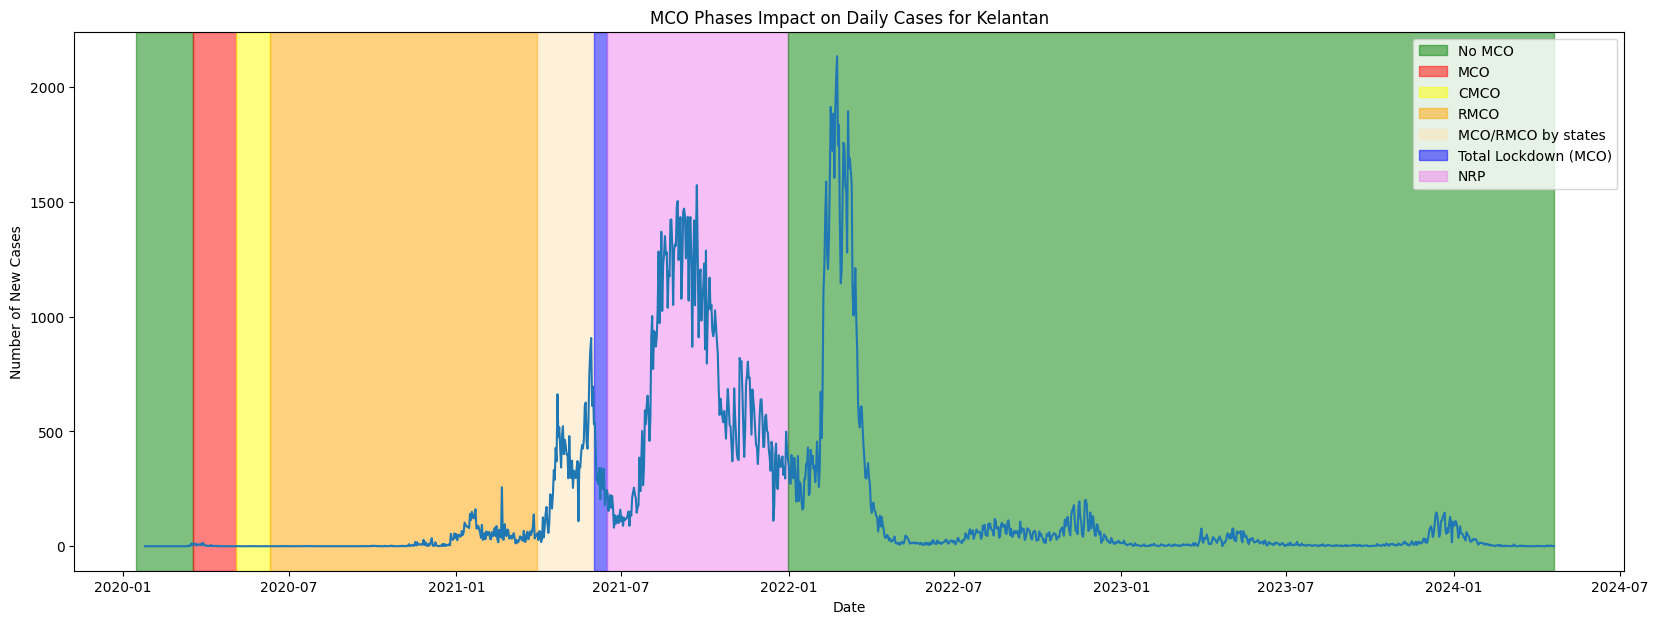

In [22]:
df_kelantan = df_state[df_state["state"] == "Kelantan"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Daily Cases for Kelantan")
plt.plot(df_kelantan["date"], df_kelantan["cases_new"])
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

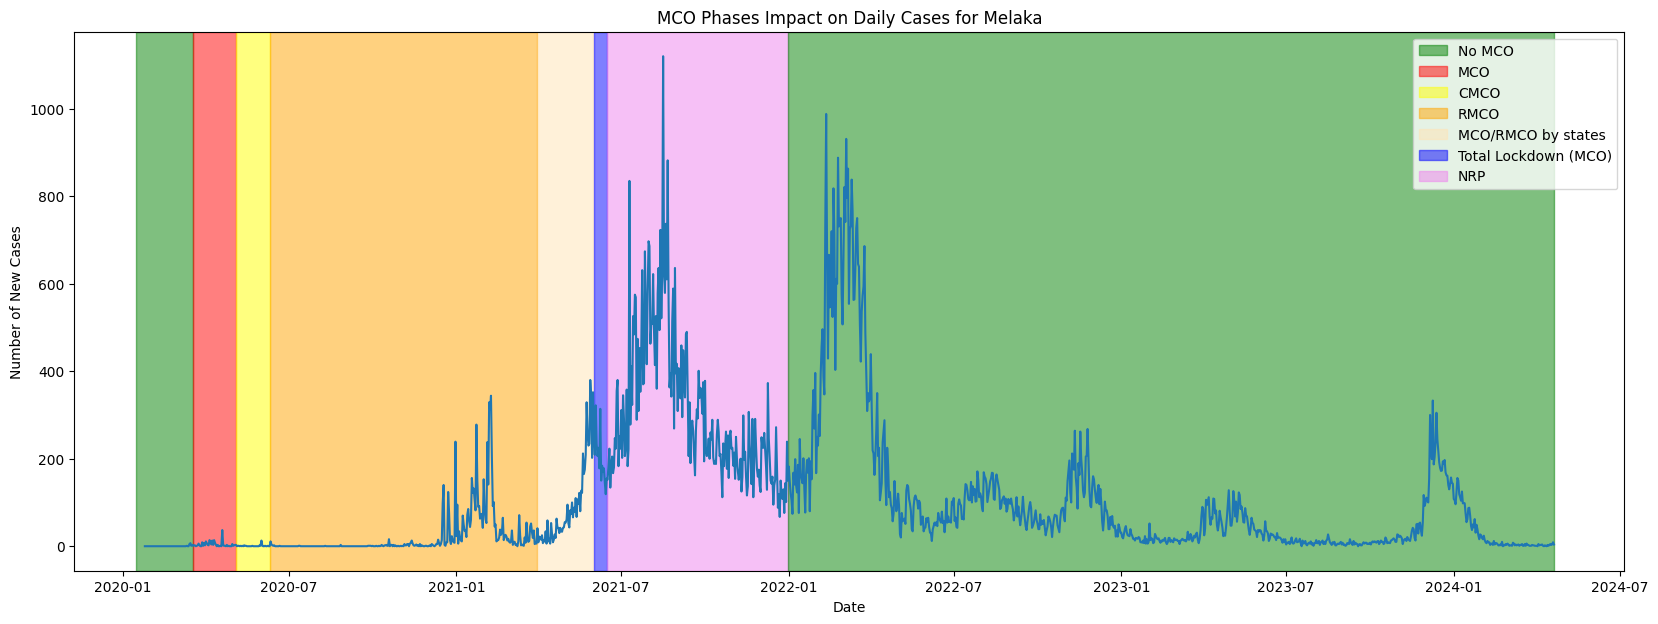

In [45]:
df_melaka = df_state[df_state["state"] == "Melaka"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Daily Cases for Melaka")
plt.plot(df_melaka["date"], df_melaka["cases_new"])
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

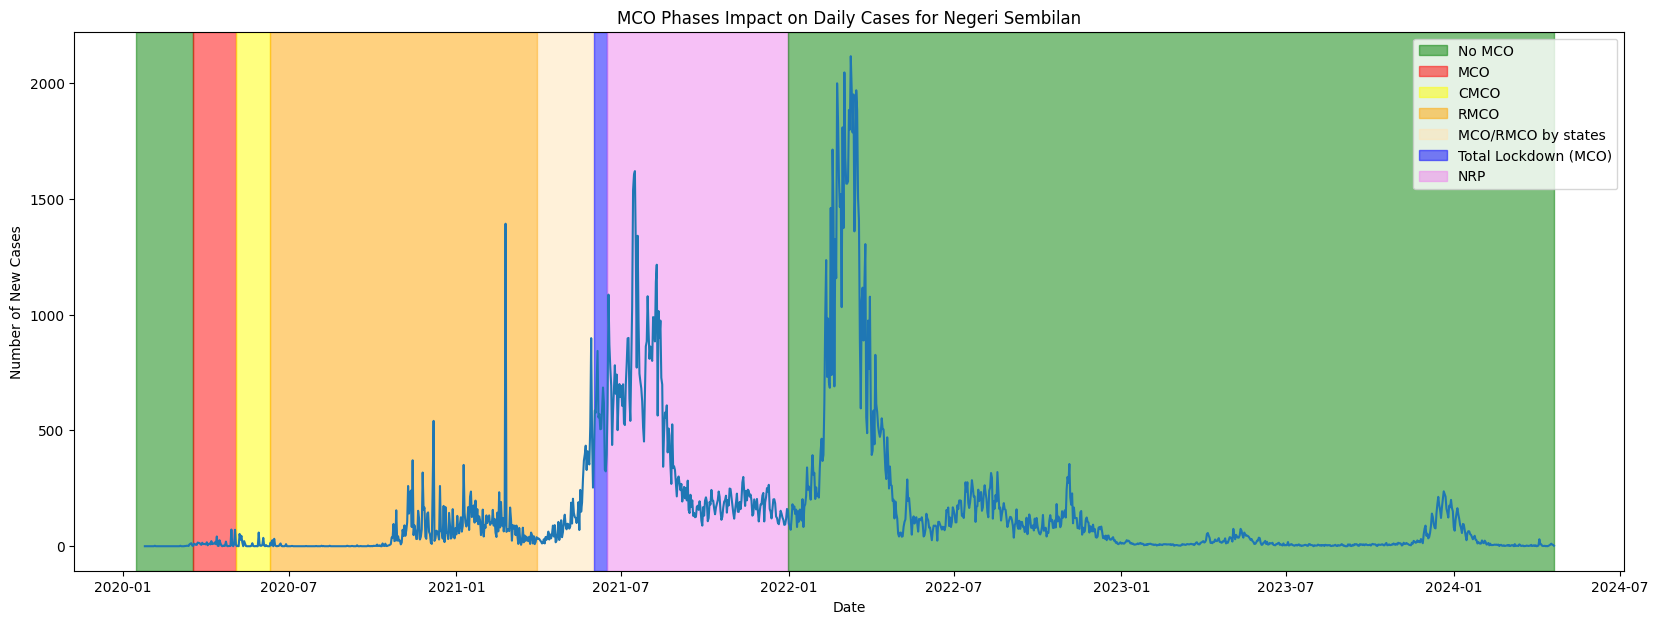

In [24]:
df_NS = df_state[df_state["state"] == "Negeri Sembilan"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Daily Cases for Negeri Sembilan")
plt.plot(df_NS["date"], df_NS["cases_new"])
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

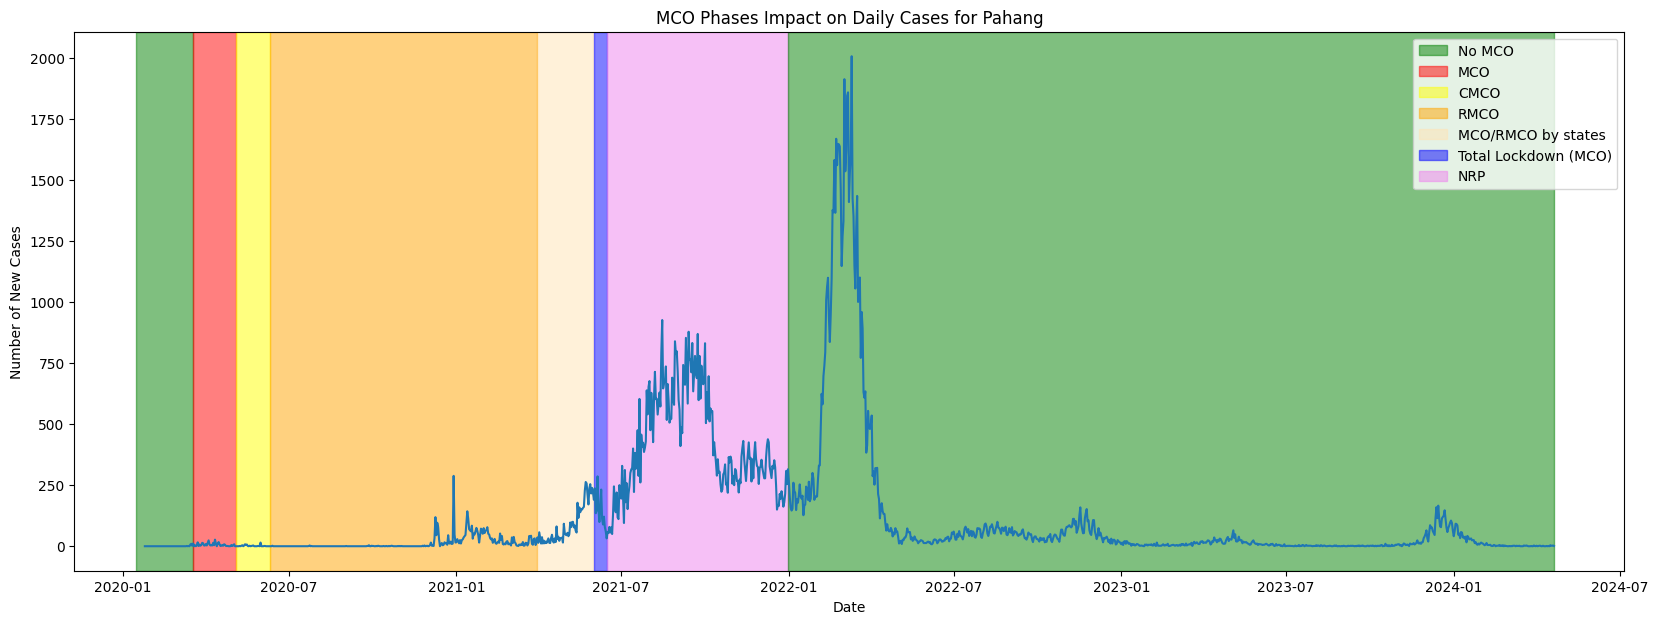

In [25]:
df_pahang = df_state[df_state["state"] == "Pahang"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Daily Cases for Pahang")
plt.plot(df_pahang["date"], df_pahang["cases_new"])
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

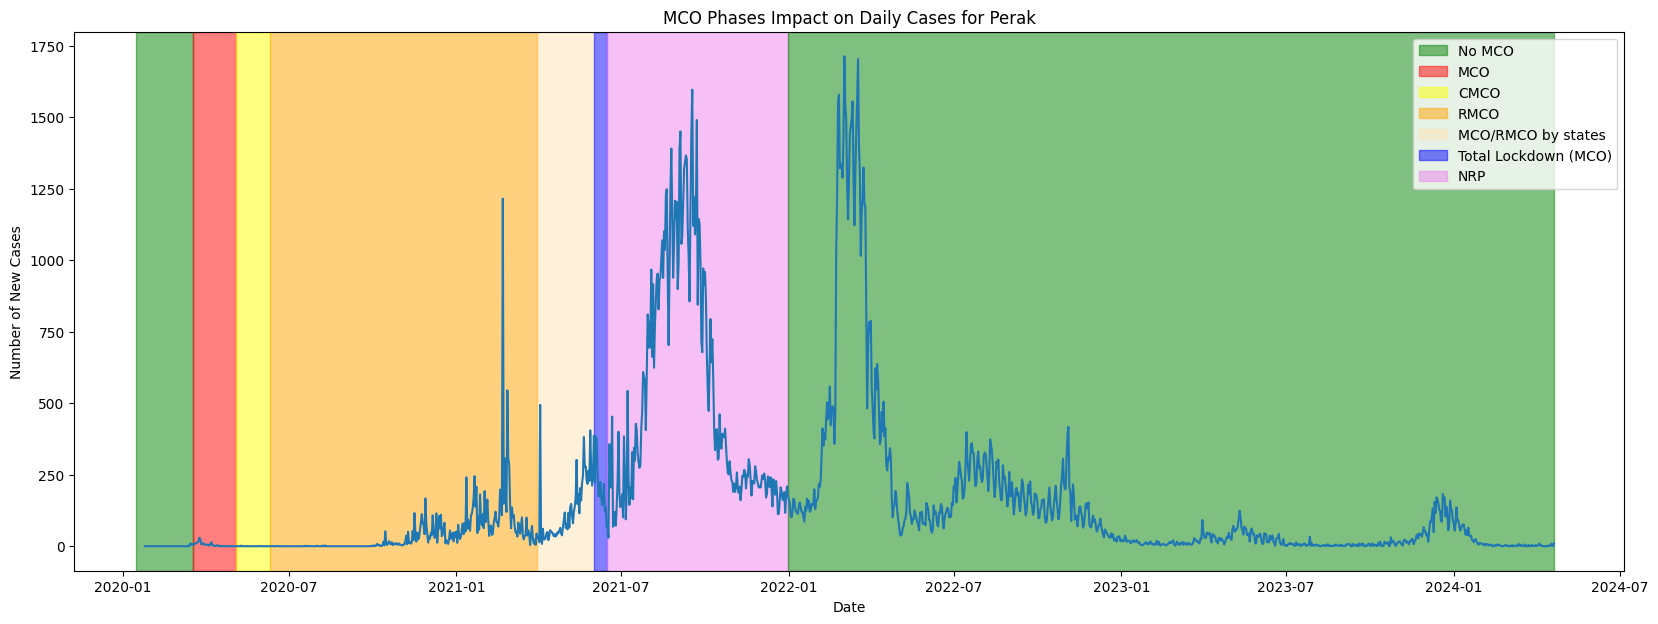

In [26]:
df_perak = df_state[df_state["state"] == "Perak"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Daily Cases for Perak")
plt.plot(df_perak["date"], df_perak["cases_new"])
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

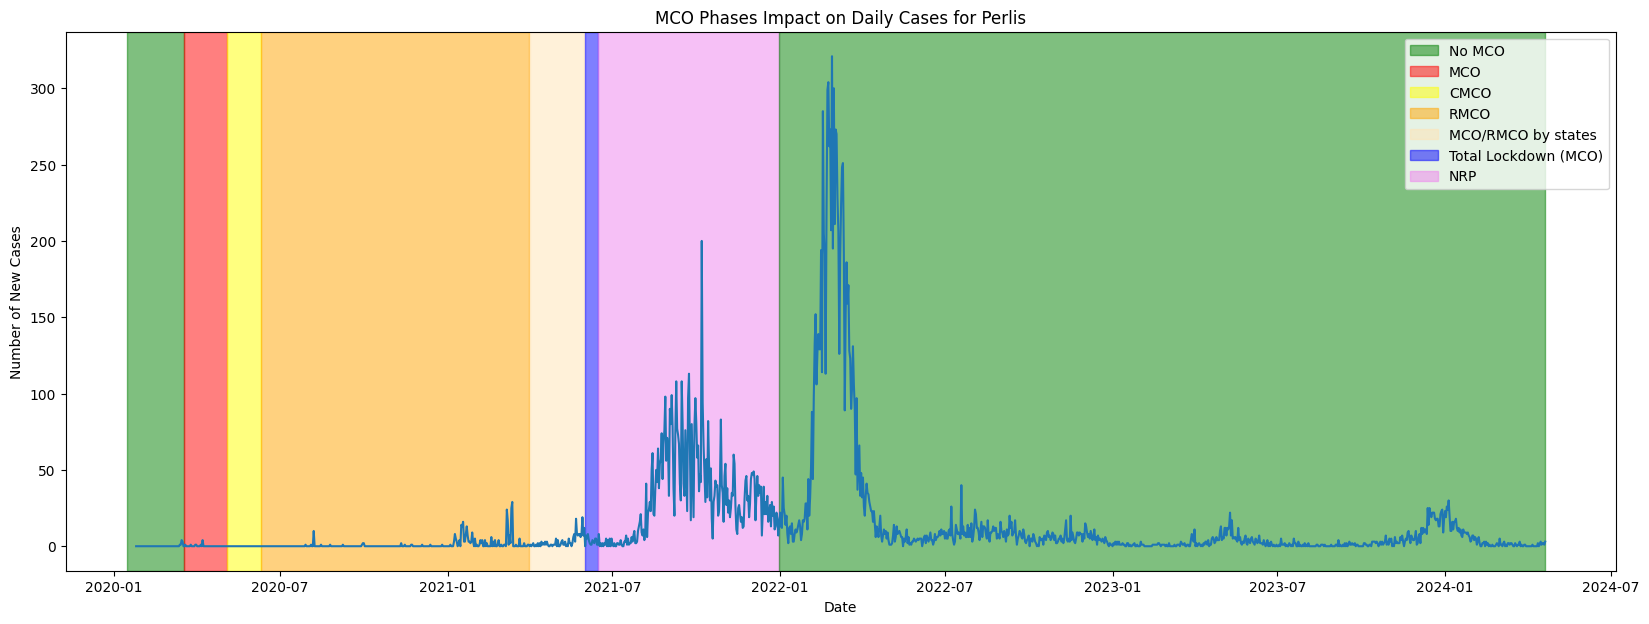

In [27]:
df_perlis = df_state[df_state["state"] == "Perlis"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Daily Cases for Perlis")
plt.plot(df_perlis["date"], df_perlis["cases_new"])
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

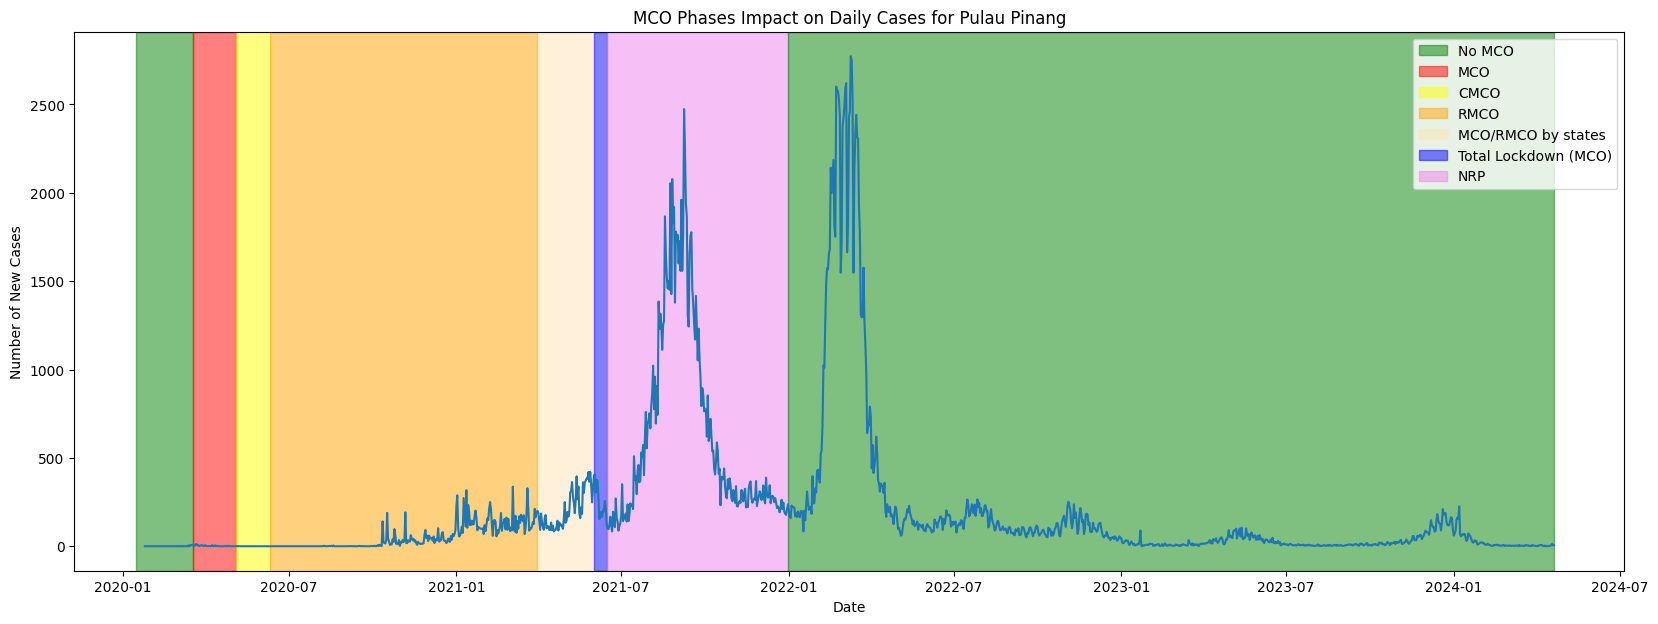

In [28]:
df_PP = df_state[df_state["state"] == "Pulau Pinang"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Daily Cases for Pulau Pinang")
plt.plot(df_PP["date"], df_PP["cases_new"])
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

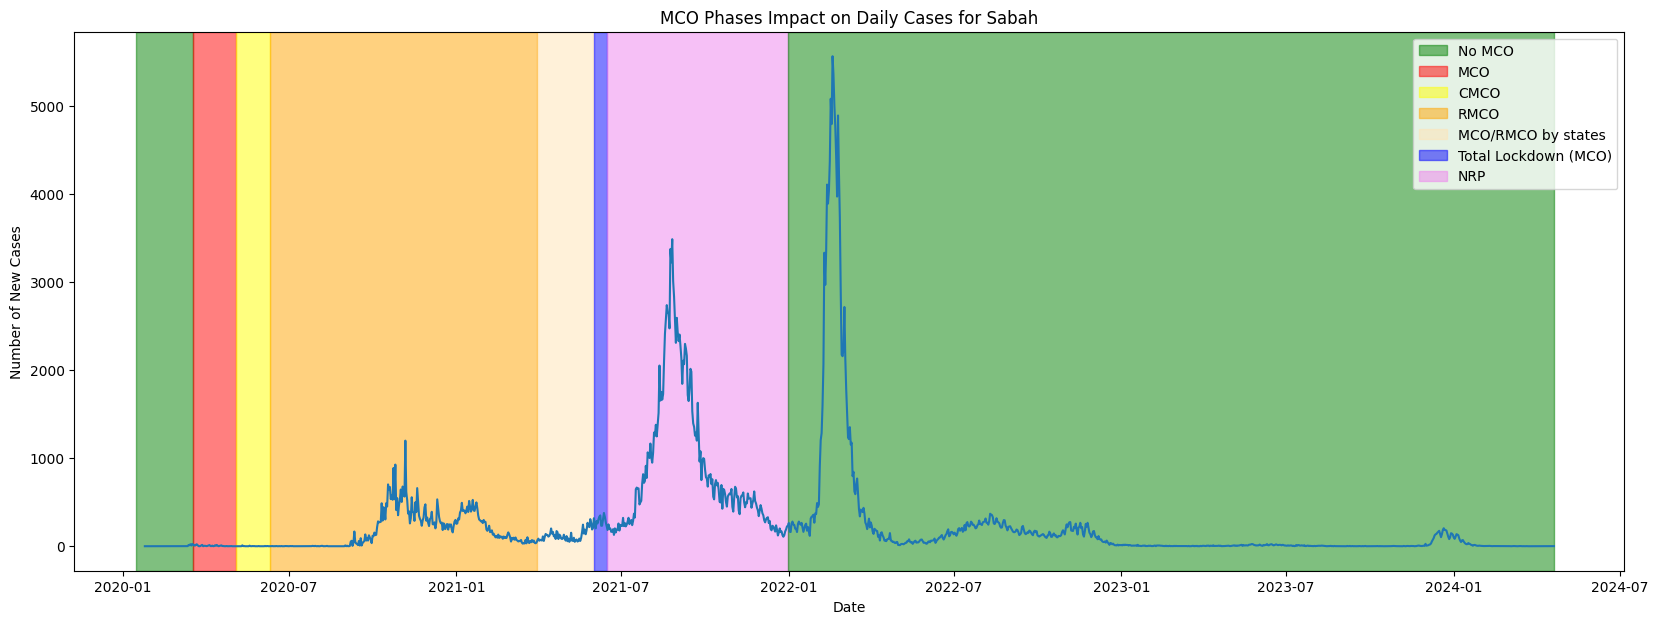

In [29]:
df_sabah = df_state[df_state["state"] == "Sabah"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Daily Cases for Sabah")
plt.plot(df_sabah["date"], df_sabah["cases_new"])
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

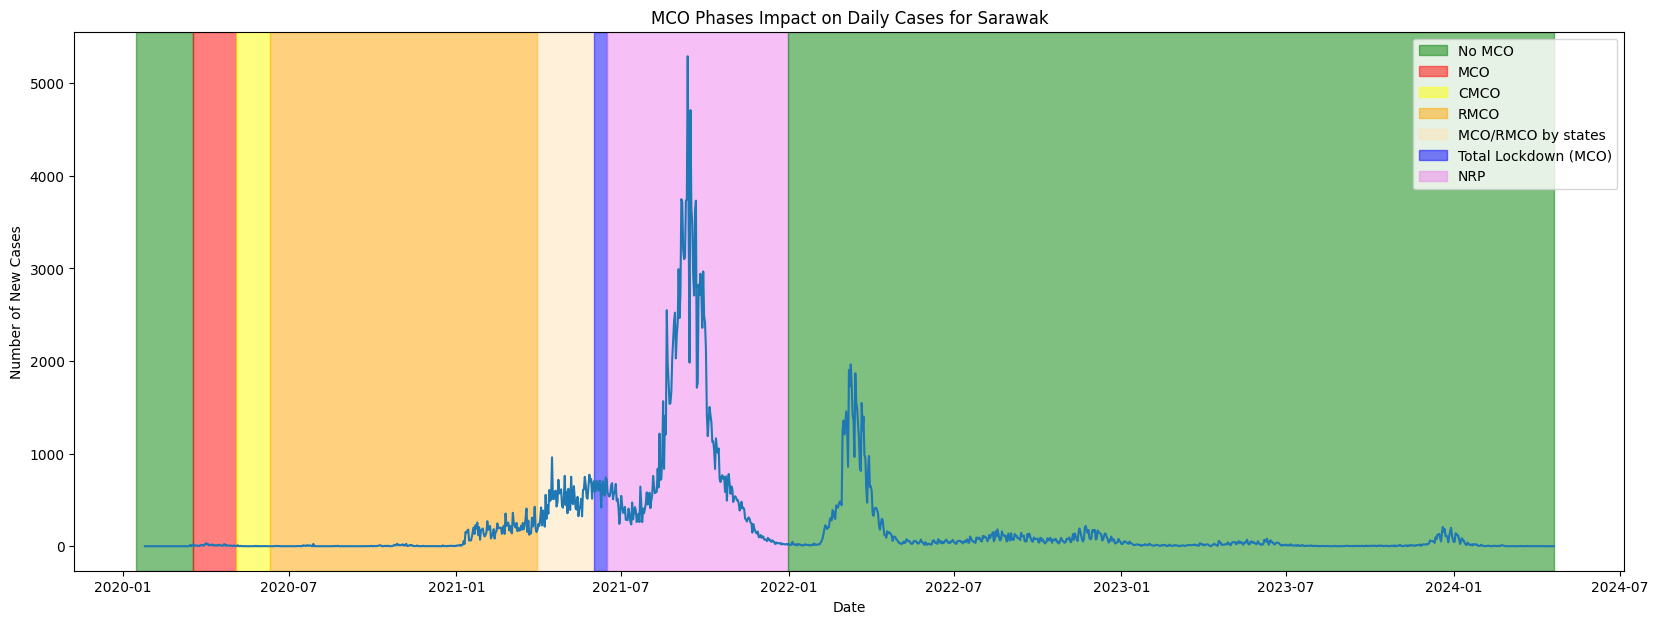

In [30]:
df_sarawak = df_state[df_state["state"] == "Sarawak"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Daily Cases for Sarawak")
plt.plot(df_sarawak["date"], df_sarawak["cases_new"])
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

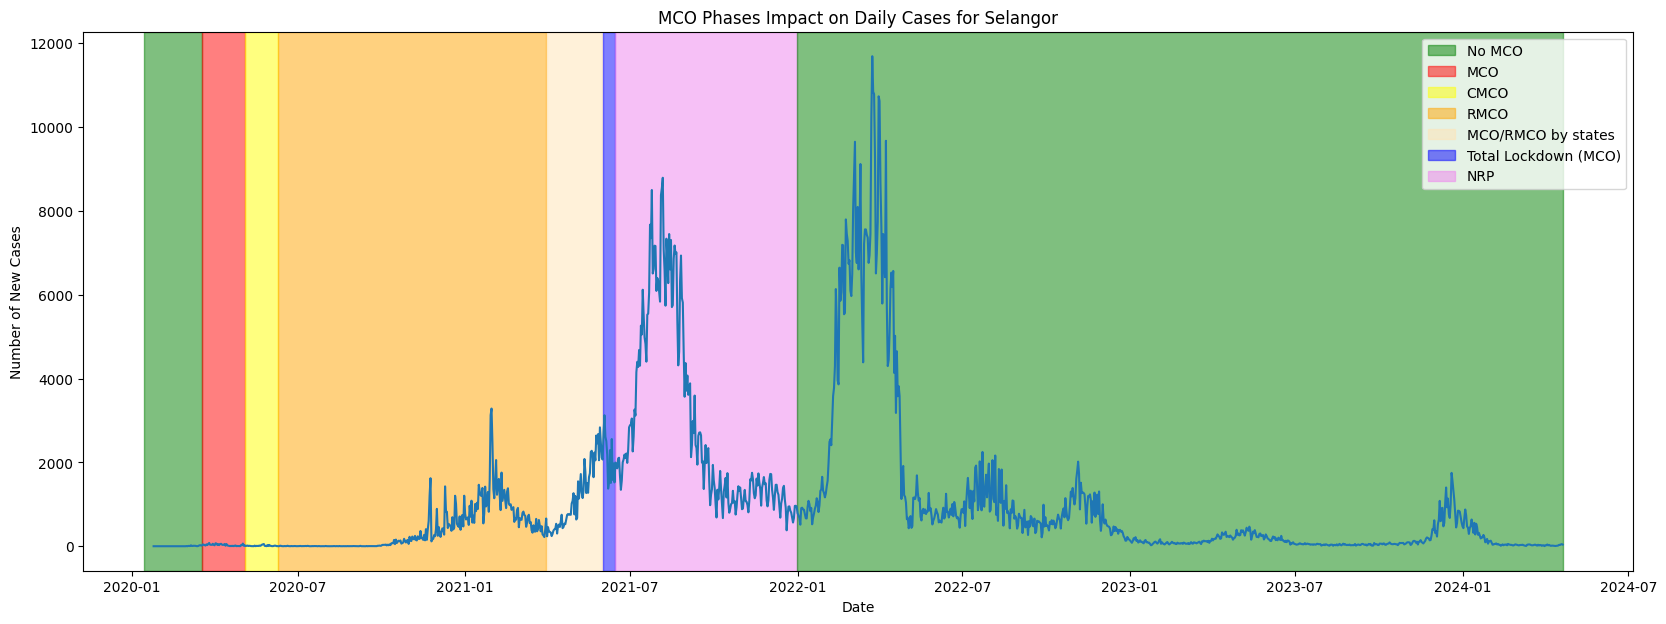

In [31]:
df_selangor = df_state[df_state["state"] == "Selangor"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Daily Cases for Selangor")
plt.plot(df_selangor["date"], df_selangor["cases_new"])
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

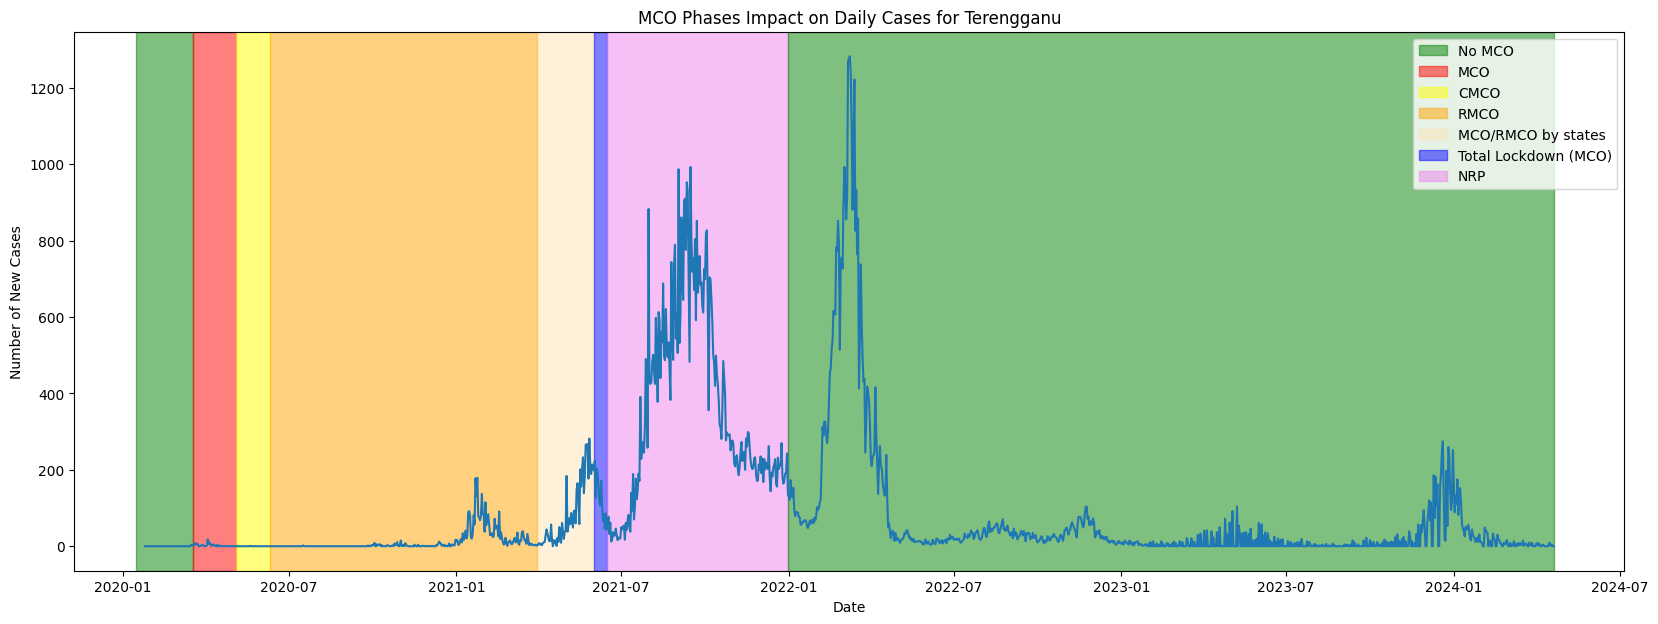

In [32]:
df_terengganu = df_state[df_state["state"] == "Terengganu"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Daily Cases for Terengganu")
plt.plot(df_terengganu["date"], df_terengganu["cases_new"])
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

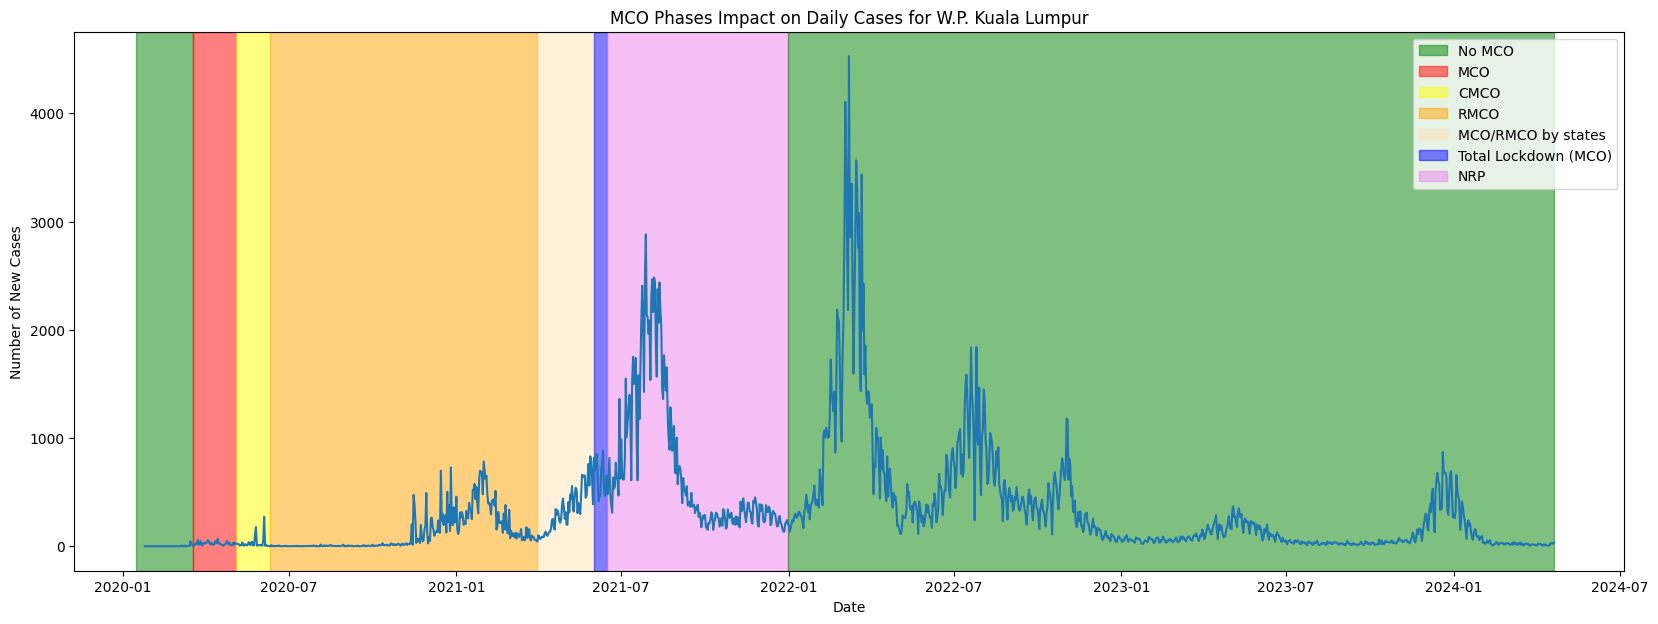

In [33]:
df_KL = df_state[df_state["state"] == "W.P. Kuala Lumpur"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Daily Cases for W.P. Kuala Lumpur")
plt.plot(df_KL["date"], df_KL["cases_new"])
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

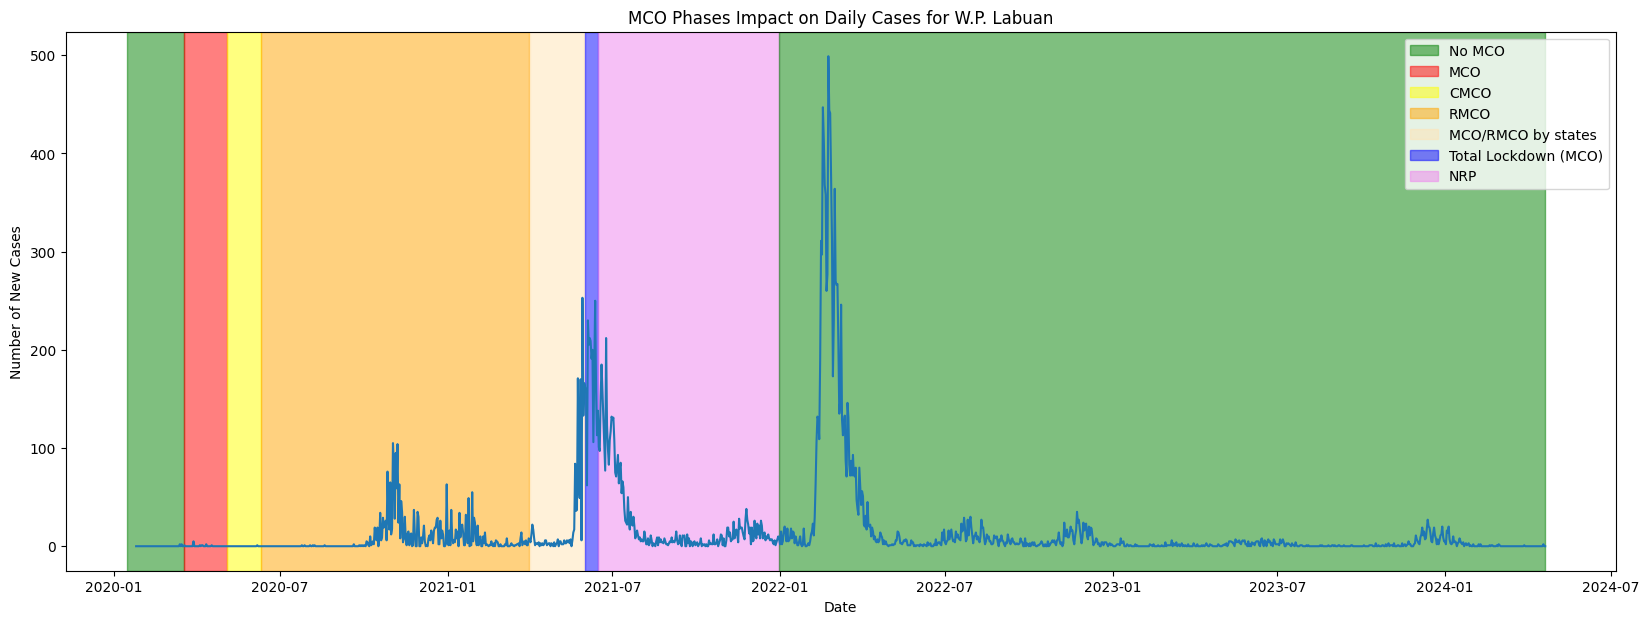

In [34]:
df_labuan = df_state[df_state["state"] == "W.P. Labuan"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Daily Cases for W.P. Labuan")
plt.plot(df_labuan["date"], df_labuan["cases_new"])
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

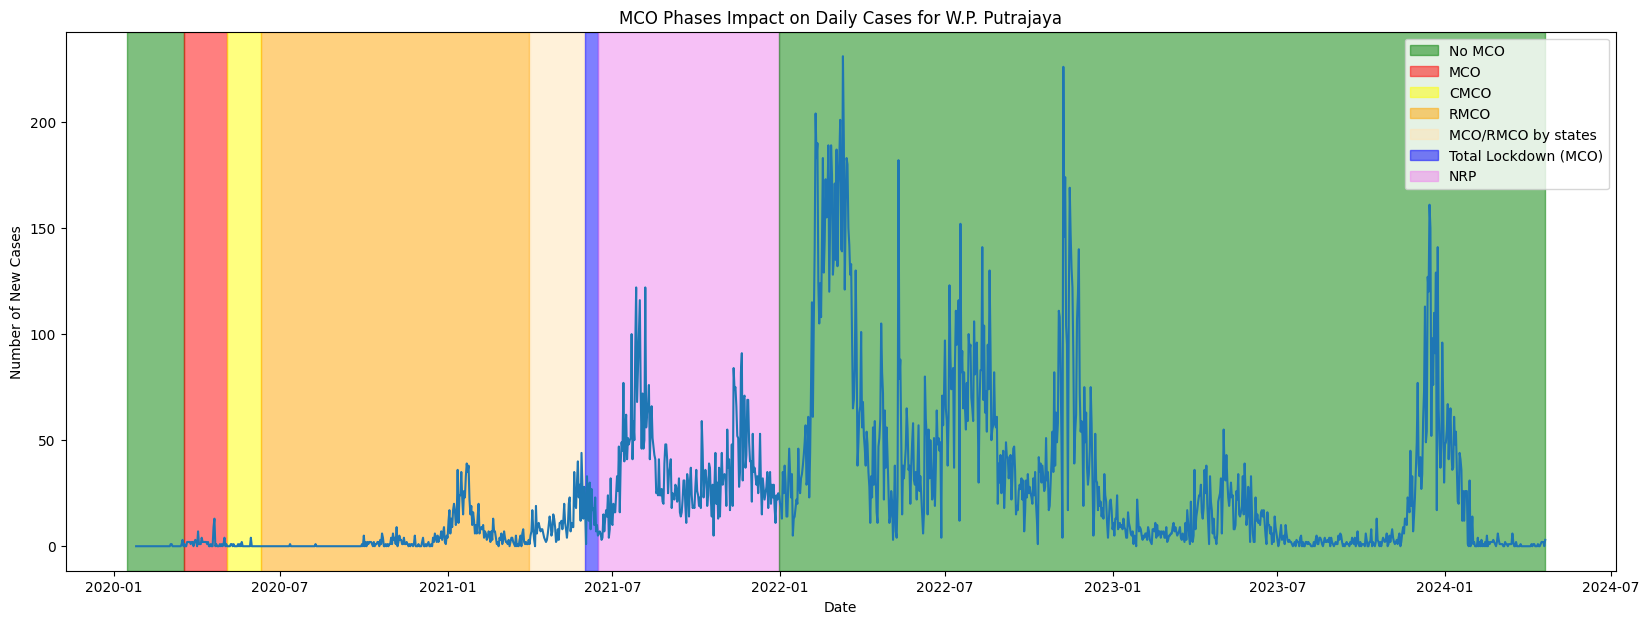

In [35]:
df_putrajaya = df_state[df_state["state"] == "W.P. Putrajaya"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Daily Cases for W.P. Putrajaya")
plt.plot(df_putrajaya["date"], df_putrajaya["cases_new"])
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

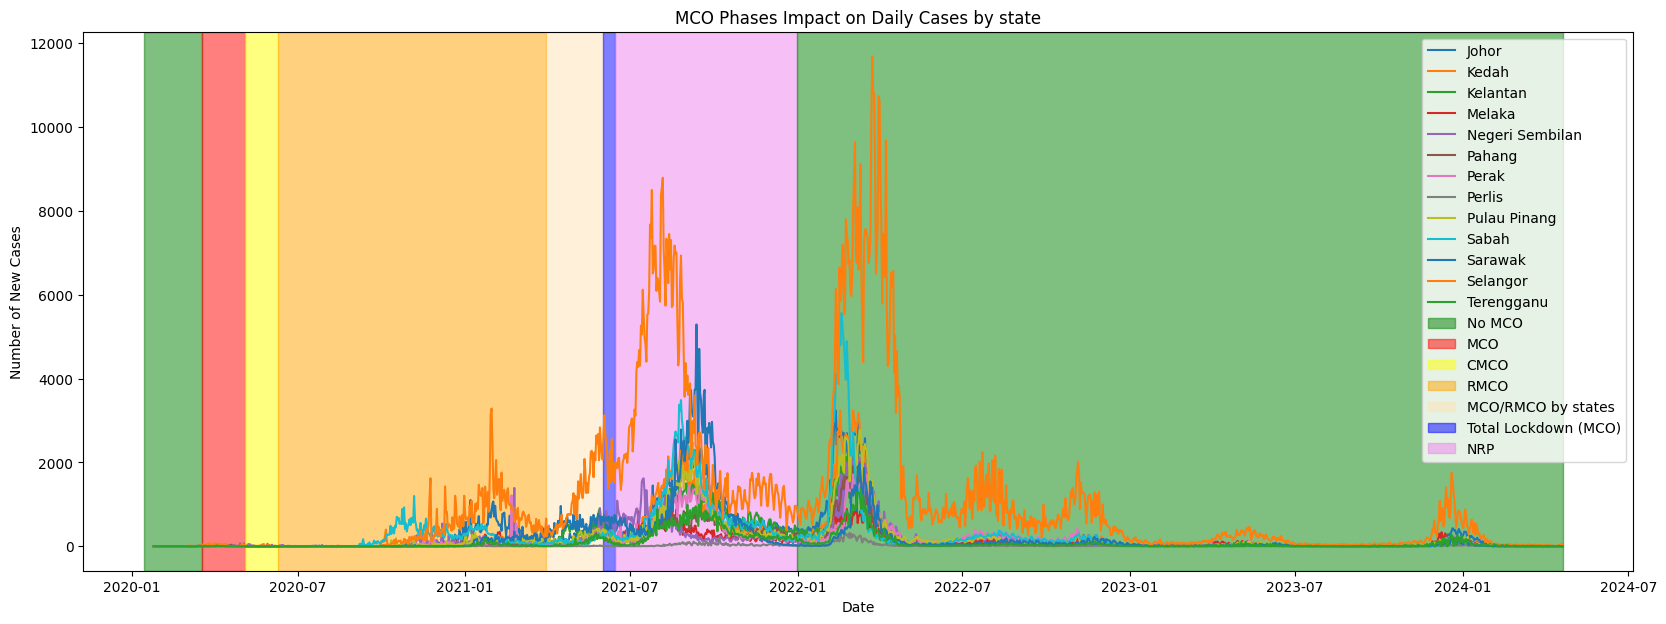

In [39]:
df_johor = df_state[df_state["state"] == "Johor"]
df_kedah = df_state[df_state["state"] == "Kedah"]
df_kelantan = df_state[df_state["state"] == "Kelantan"]
df_melaka = df_state[df_state["state"] == "Melaka"]
df_NS = df_state[df_state["state"] == "Negeri Sembilan"]
df_pahang = df_state[df_state["state"] == "Pahang"]
df_perak = df_state[df_state["state"] == "Perak"]
df_perlis = df_state[df_state["state"] == "Perlis"]
df_PP = df_state[df_state["state"] == "Pulau Pinang"]
df_sabah = df_state[df_state["state"] == "Sabah"]
df_sarawak = df_state[df_state["state"] == "Sarawak"]
df_selangor = df_state[df_state["state"] == "Selangor"]
df_terengganu = df_state[df_state["state"] == "Terengganu"]


plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Daily Cases by state")

plt.plot(df_johor["date"], df_johor["cases_new"], label="Johor")
plt.plot(df_kedah["date"], df_kedah["cases_new"], label="Kedah")
plt.plot(df_kelantan["date"], df_kelantan["cases_new"], label="Kelantan")
plt.plot(df_melaka["date"], df_melaka["cases_new"], label="Melaka")
plt.plot(df_NS["date"], df_NS["cases_new"], label="Negeri Sembilan")
plt.plot(df_pahang["date"], df_pahang["cases_new"], label="Pahang")
plt.plot(df_perak["date"], df_perak["cases_new"], label="Perak")
plt.plot(df_perlis["date"], df_perlis["cases_new"], label="Perlis")
plt.plot(df_PP["date"], df_PP["cases_new"], label="Pulau Pinang")
plt.plot(df_sabah["date"], df_sabah["cases_new"], label="Sabah")
plt.plot(df_sarawak["date"], df_sarawak["cases_new"], label="Sarawak")
plt.plot(df_selangor["date"], df_selangor["cases_new"], label="Selangor")
plt.plot(df_terengganu["date"], df_terengganu["cases_new"], label="Terengganu")

plt.xlabel("Date")
plt.ylabel("Number of New Cases")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

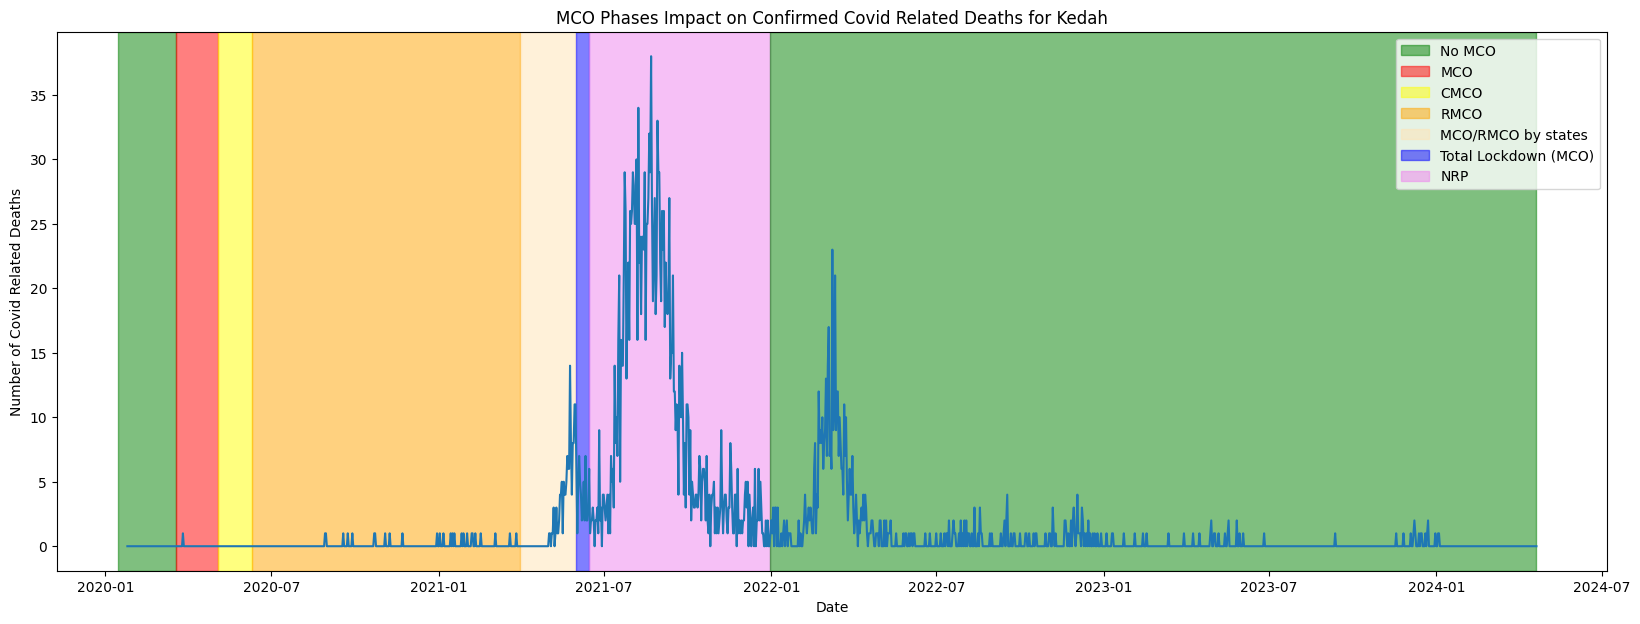

In [41]:
df_kedah = df_state[df_state["state"] == "Kedah"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Confirmed Covid Related Deaths for Kedah")
plt.plot(df_kedah["date"], df_kedah["deaths_new_dod"])
plt.xlabel("Date")
plt.ylabel("Number of Covid Related Deaths")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

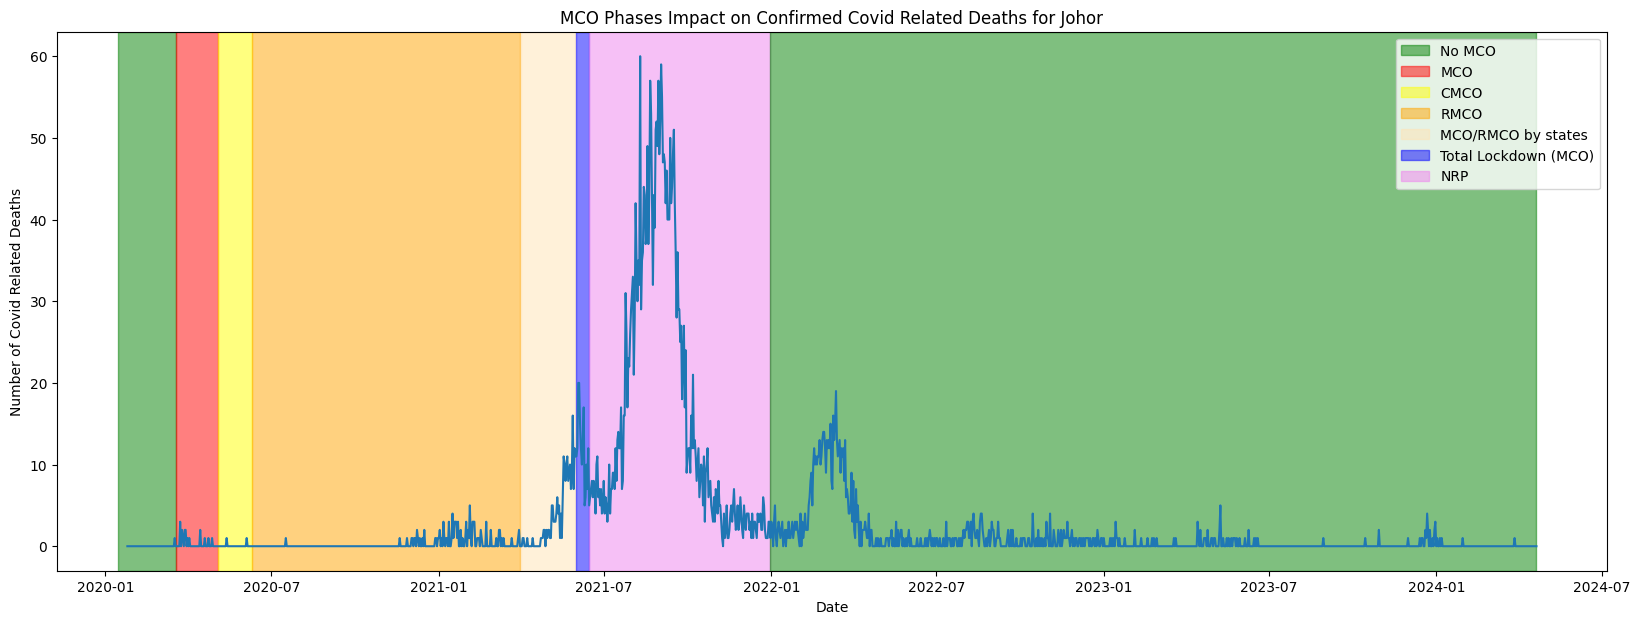

In [42]:
df_johor = df_state[df_state["state"] == "Johor"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Confirmed Covid Related Deaths for Johor")
plt.plot(df_johor["date"], df_johor["deaths_new_dod"])
plt.xlabel("Date")
plt.ylabel("Number of Covid Related Deaths")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

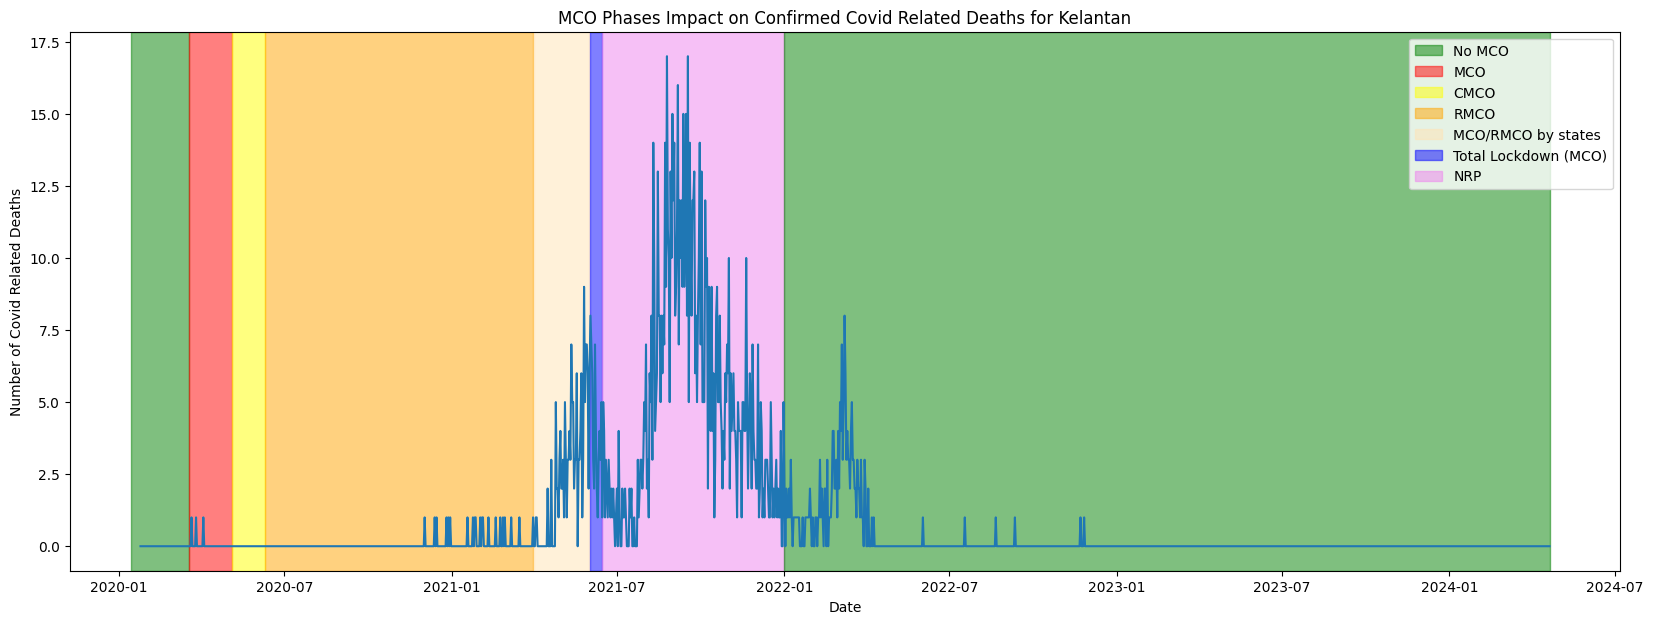

In [43]:
df_kelantan = df_state[df_state["state"] == "Kelantan"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Confirmed Covid Related Deaths for Kelantan")
plt.plot(df_kelantan["date"], df_kelantan["deaths_new_dod"])
plt.xlabel("Date")
plt.ylabel("Number of Covid Related Deaths")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

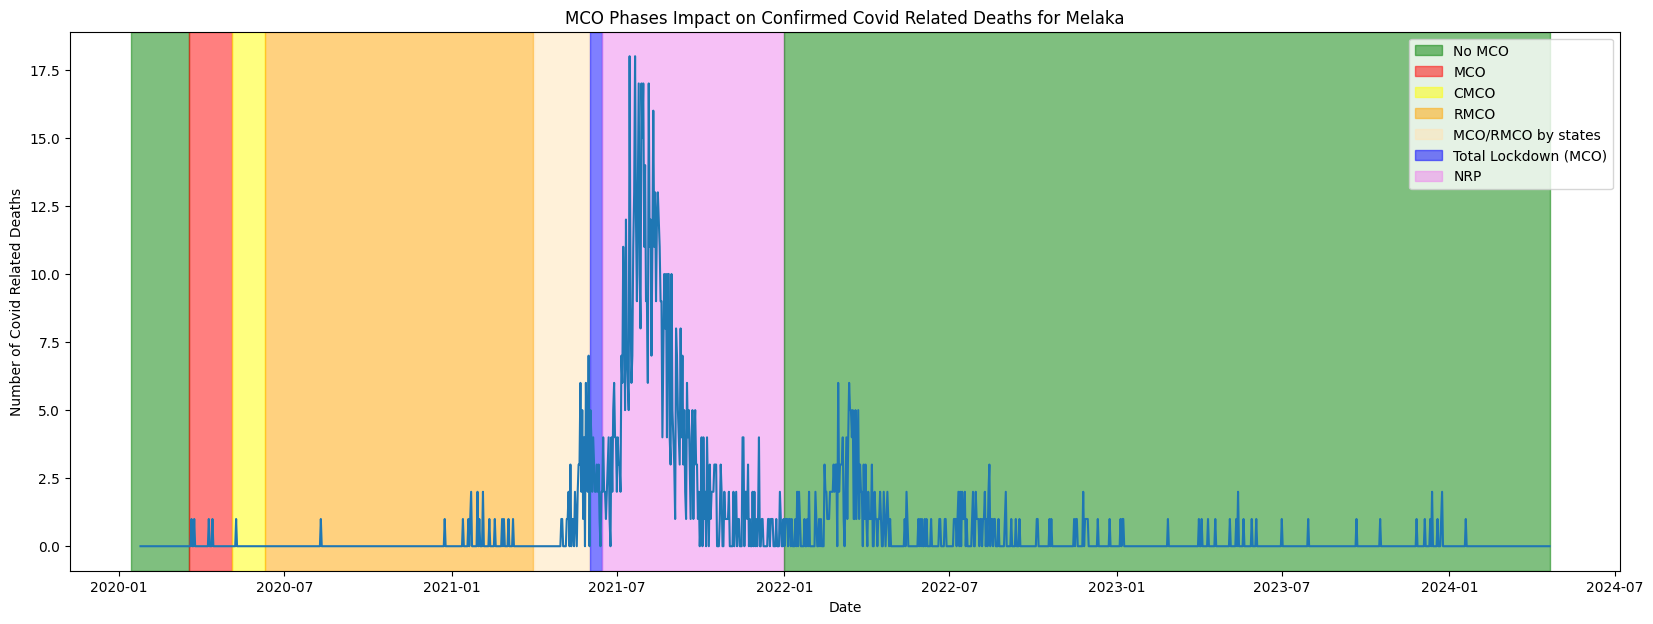

In [44]:
df_melaka = df_state[df_state["state"] == "Melaka"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Confirmed Covid Related Deaths for Melaka")
plt.plot(df_melaka["date"], df_melaka["deaths_new_dod"])
plt.xlabel("Date")
plt.ylabel("Number of Covid Related Deaths")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

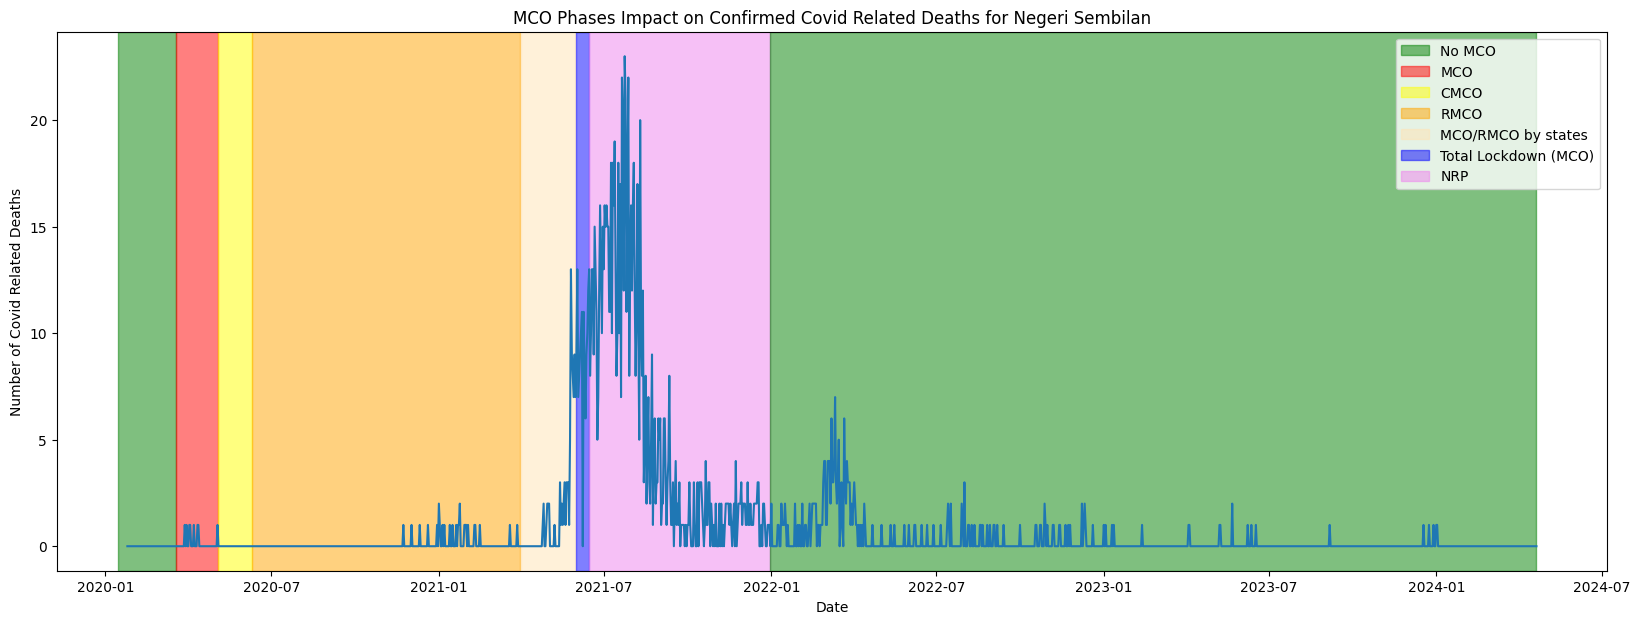

In [46]:
df_NS = df_state[df_state["state"] == "Negeri Sembilan"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Confirmed Covid Related Deaths for Negeri Sembilan")
plt.plot(df_NS["date"], df_NS["deaths_new_dod"])
plt.xlabel("Date")
plt.ylabel("Number of Covid Related Deaths")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

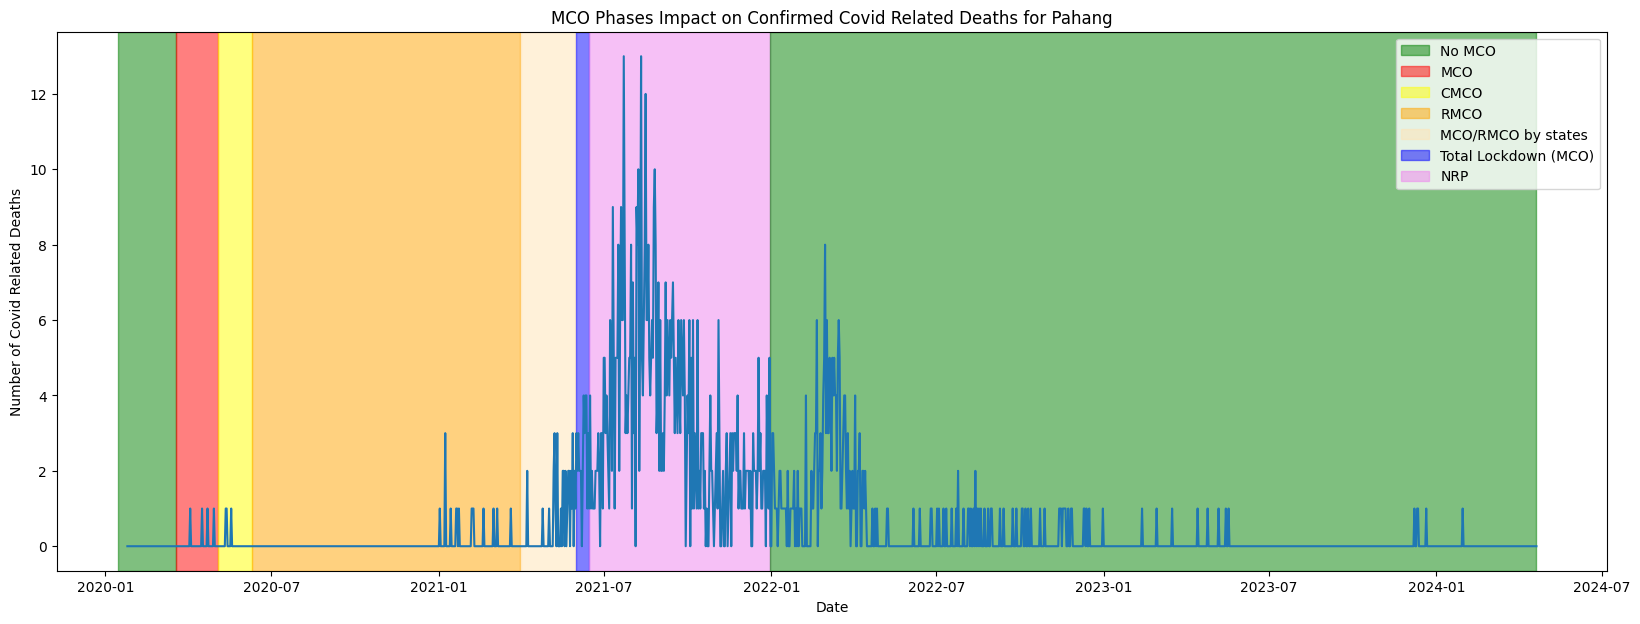

In [47]:
df_pahang = df_state[df_state["state"] == "Pahang"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Confirmed Covid Related Deaths for Pahang")
plt.plot(df_pahang["date"], df_pahang["deaths_new_dod"])
plt.xlabel("Date")
plt.ylabel("Number of Covid Related Deaths")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

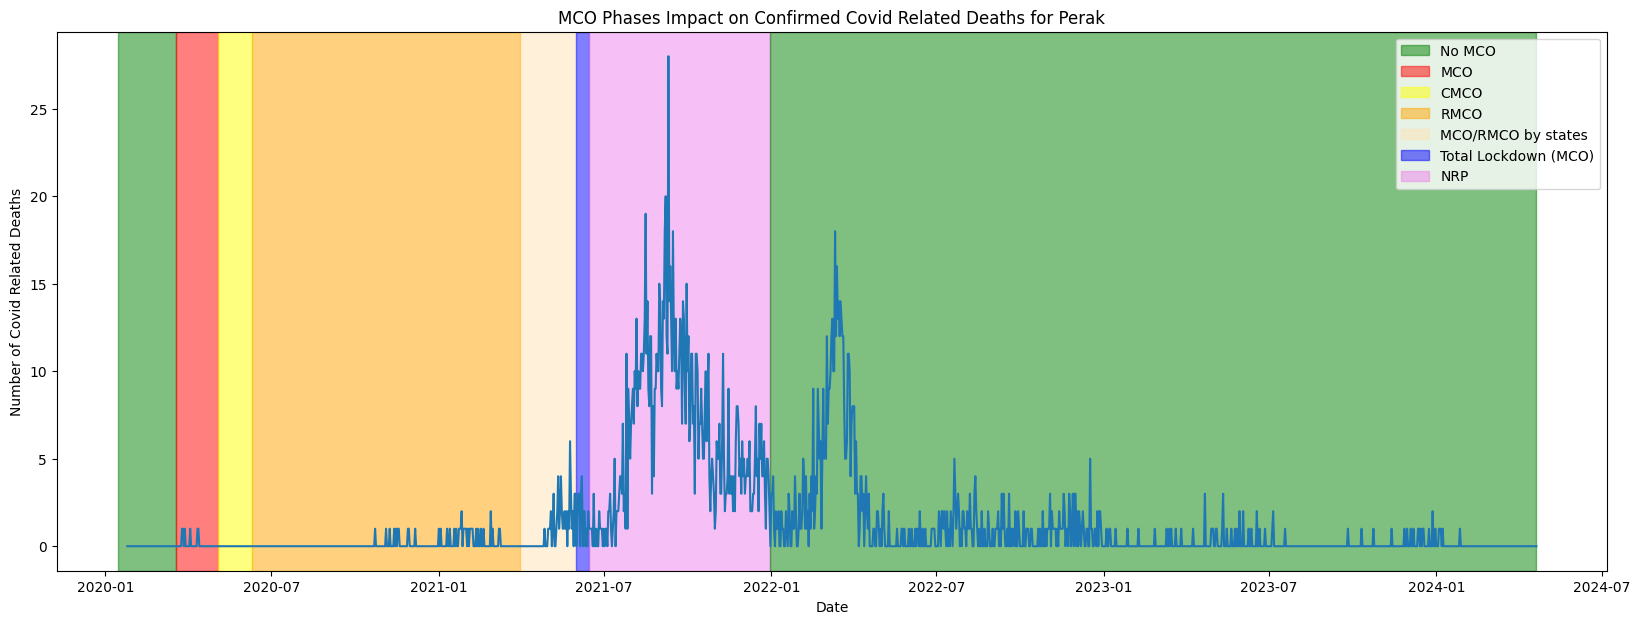

In [48]:
df_perak = df_state[df_state["state"] == "Perak"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Confirmed Covid Related Deaths for Perak")
plt.plot(df_perak["date"], df_perak["deaths_new_dod"])
plt.xlabel("Date")
plt.ylabel("Number of Covid Related Deaths")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

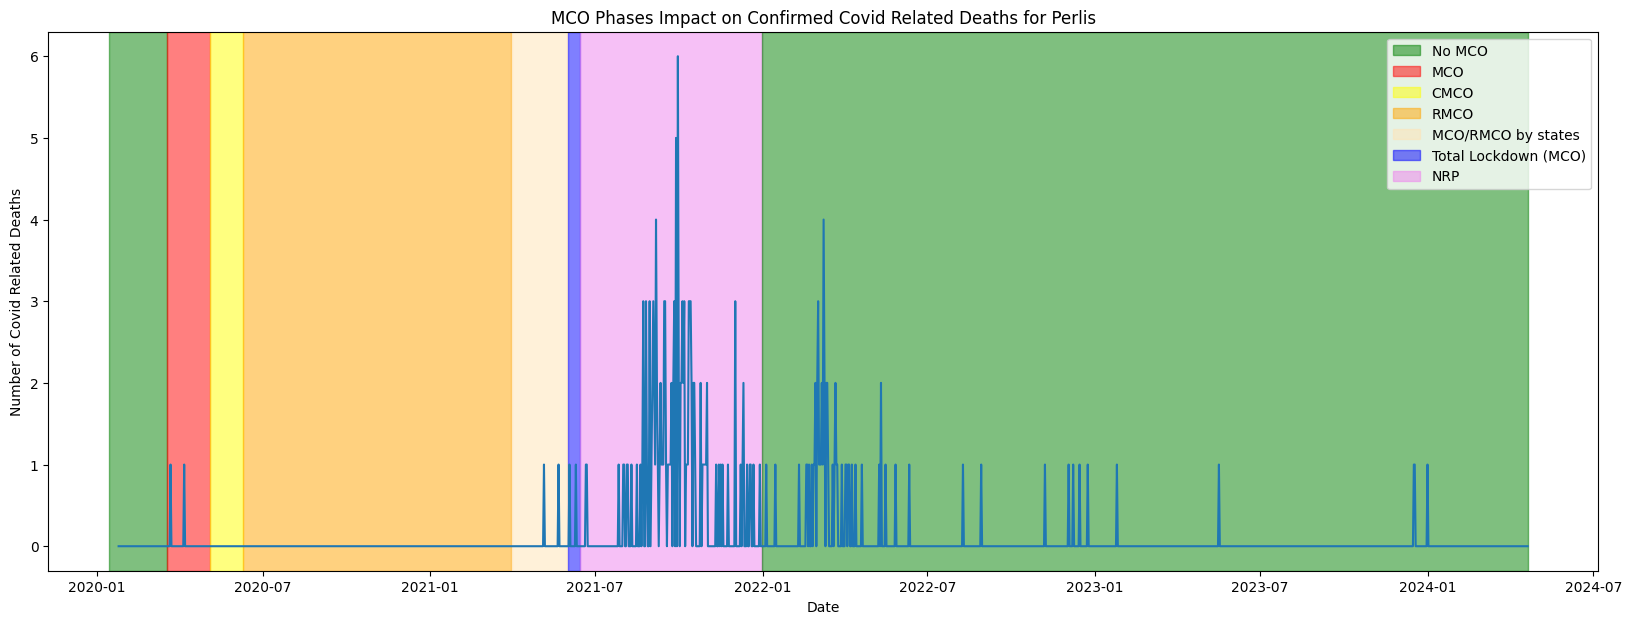

In [49]:
df_perlis = df_state[df_state["state"] == "Perlis"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Confirmed Covid Related Deaths for Perlis")
plt.plot(df_perlis["date"], df_perlis["deaths_new_dod"])
plt.xlabel("Date")
plt.ylabel("Number of Covid Related Deaths")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

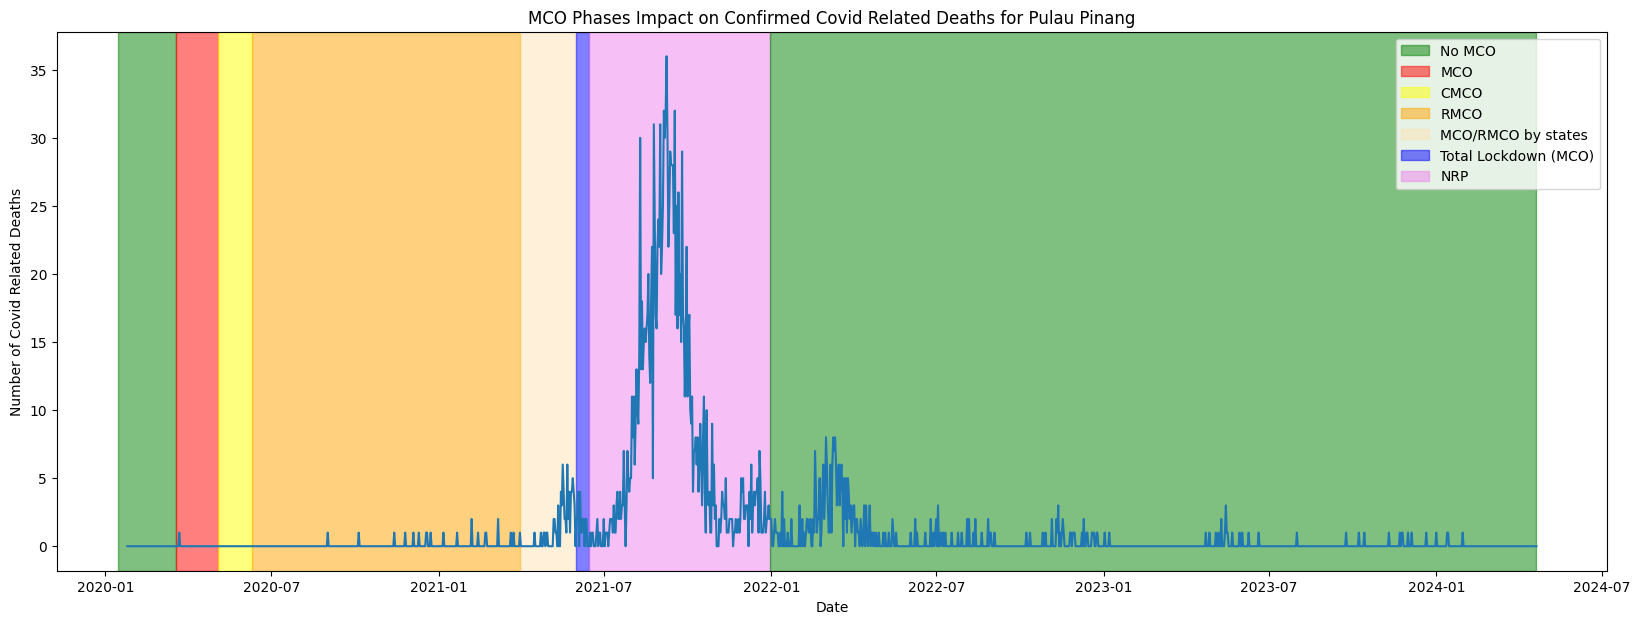

In [50]:
df_PP = df_state[df_state["state"] == "Pulau Pinang"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Confirmed Covid Related Deaths for Pulau Pinang")
plt.plot(df_PP["date"], df_PP["deaths_new_dod"])
plt.xlabel("Date")
plt.ylabel("Number of Covid Related Deaths")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

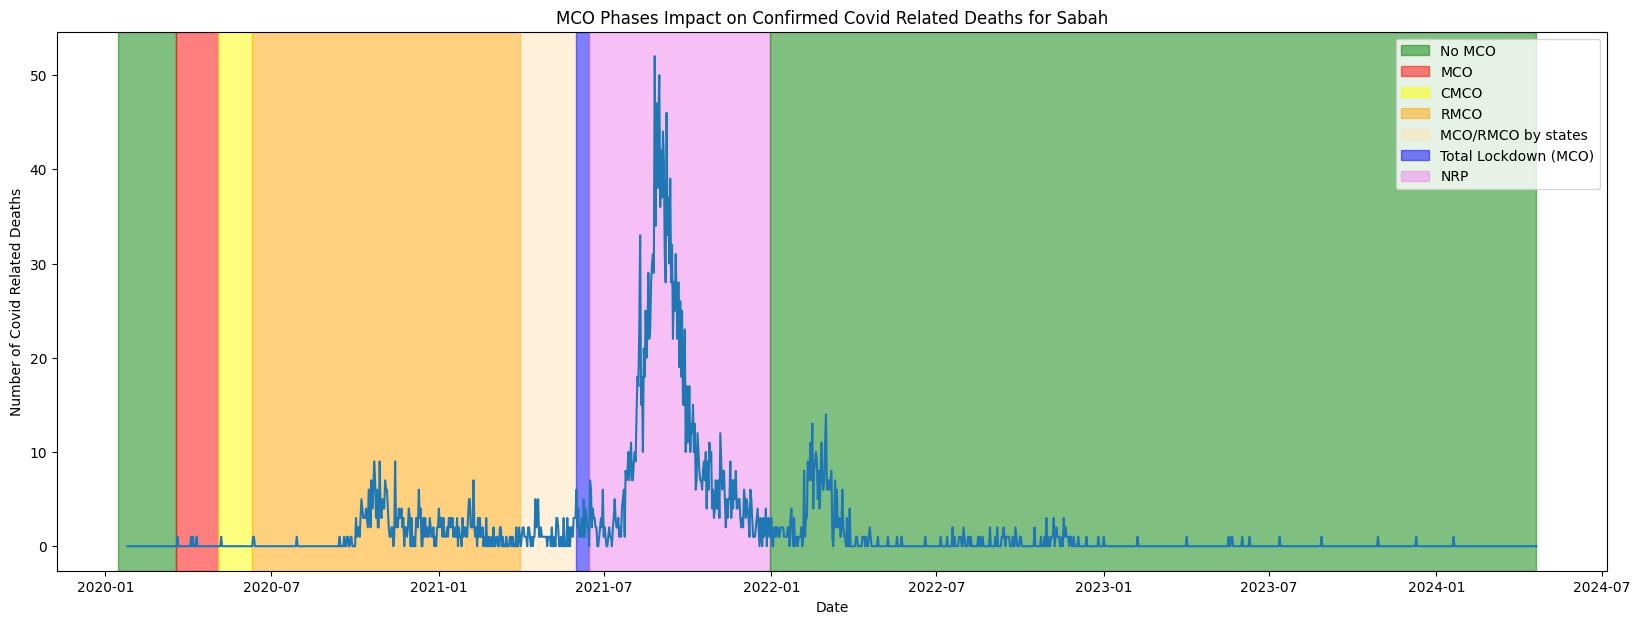

In [51]:
df_sabah = df_state[df_state["state"] == "Sabah"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Confirmed Covid Related Deaths for Sabah")
plt.plot(df_sabah["date"], df_sabah["deaths_new_dod"])
plt.xlabel("Date")
plt.ylabel("Number of Covid Related Deaths")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

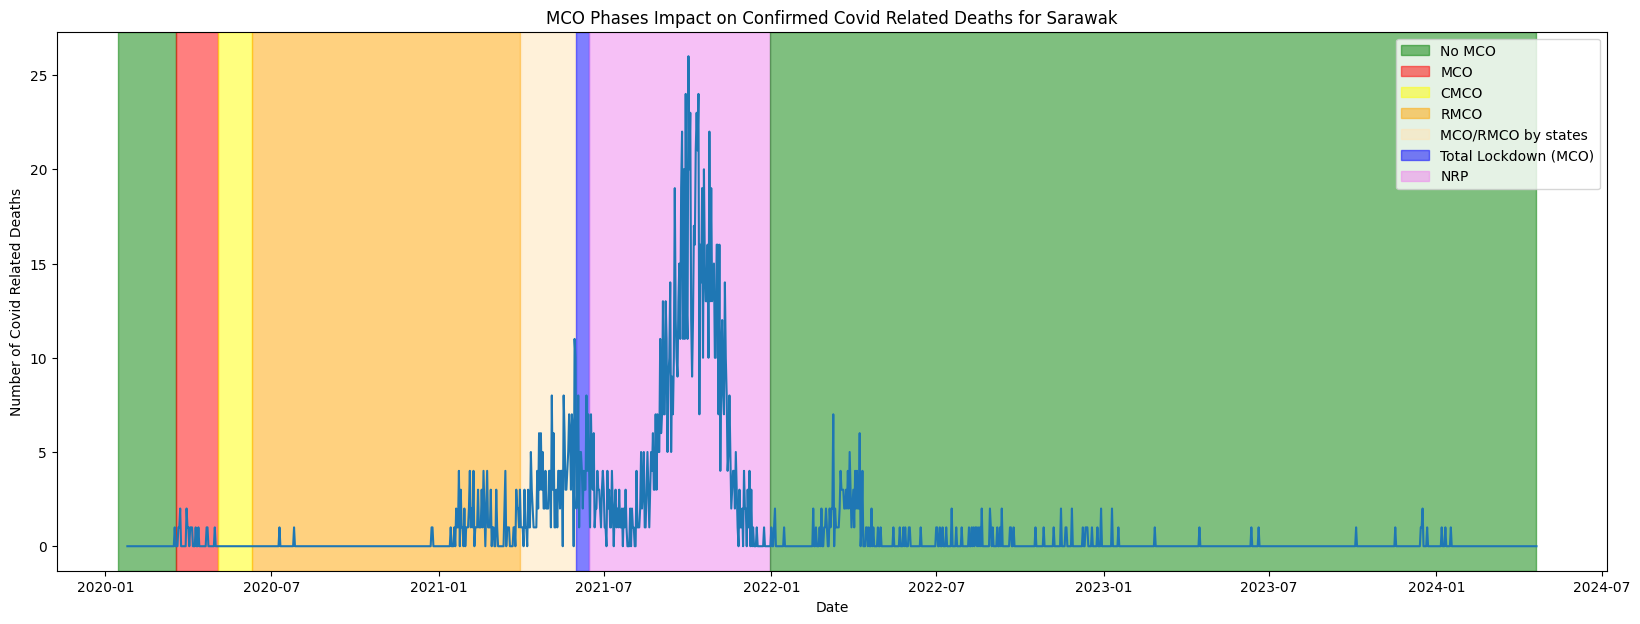

In [52]:
df_sarawak = df_state[df_state["state"] == "Sarawak"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Confirmed Covid Related Deaths for Sarawak")
plt.plot(df_sarawak["date"], df_sarawak["deaths_new_dod"])
plt.xlabel("Date")
plt.ylabel("Number of Covid Related Deaths")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

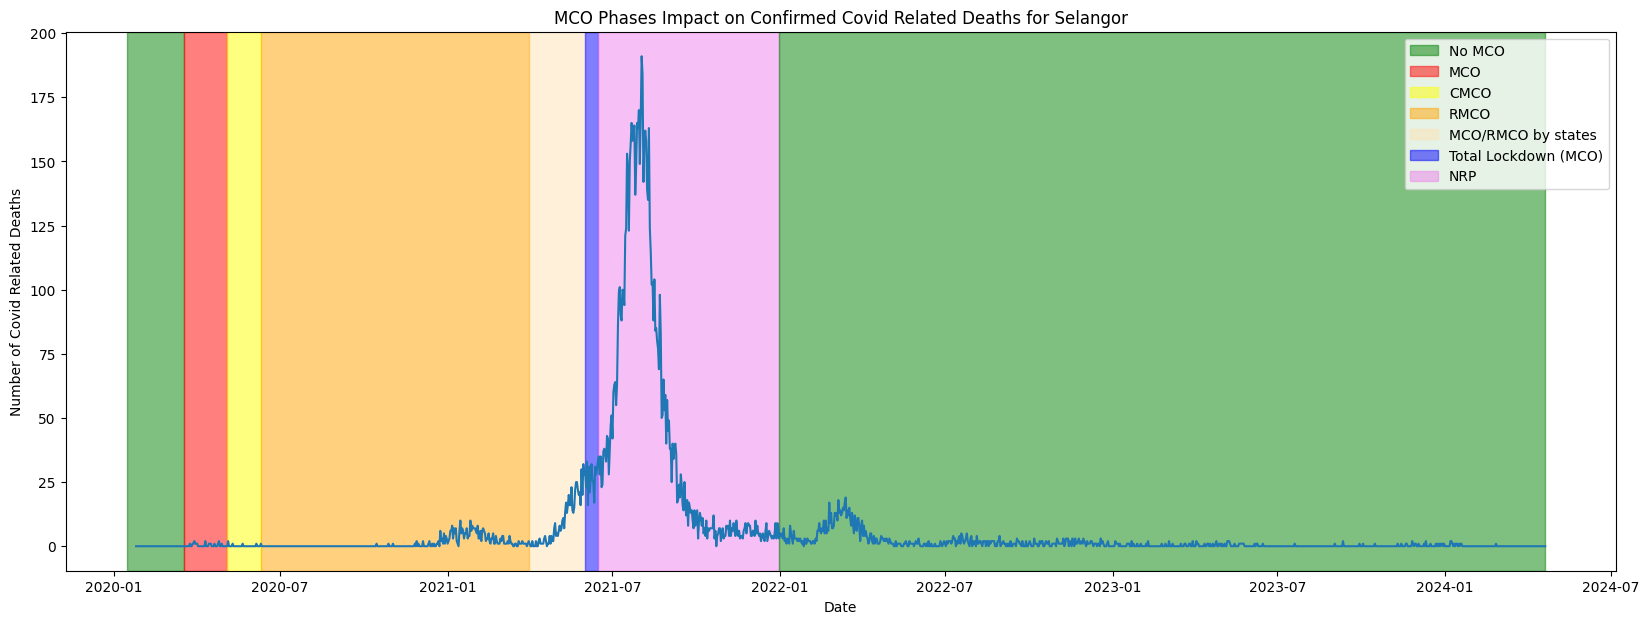

In [53]:
df_selangor = df_state[df_state["state"] == "Selangor"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Confirmed Covid Related Deaths for Selangor")
plt.plot(df_selangor["date"], df_selangor["deaths_new_dod"])
plt.xlabel("Date")
plt.ylabel("Number of Covid Related Deaths")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

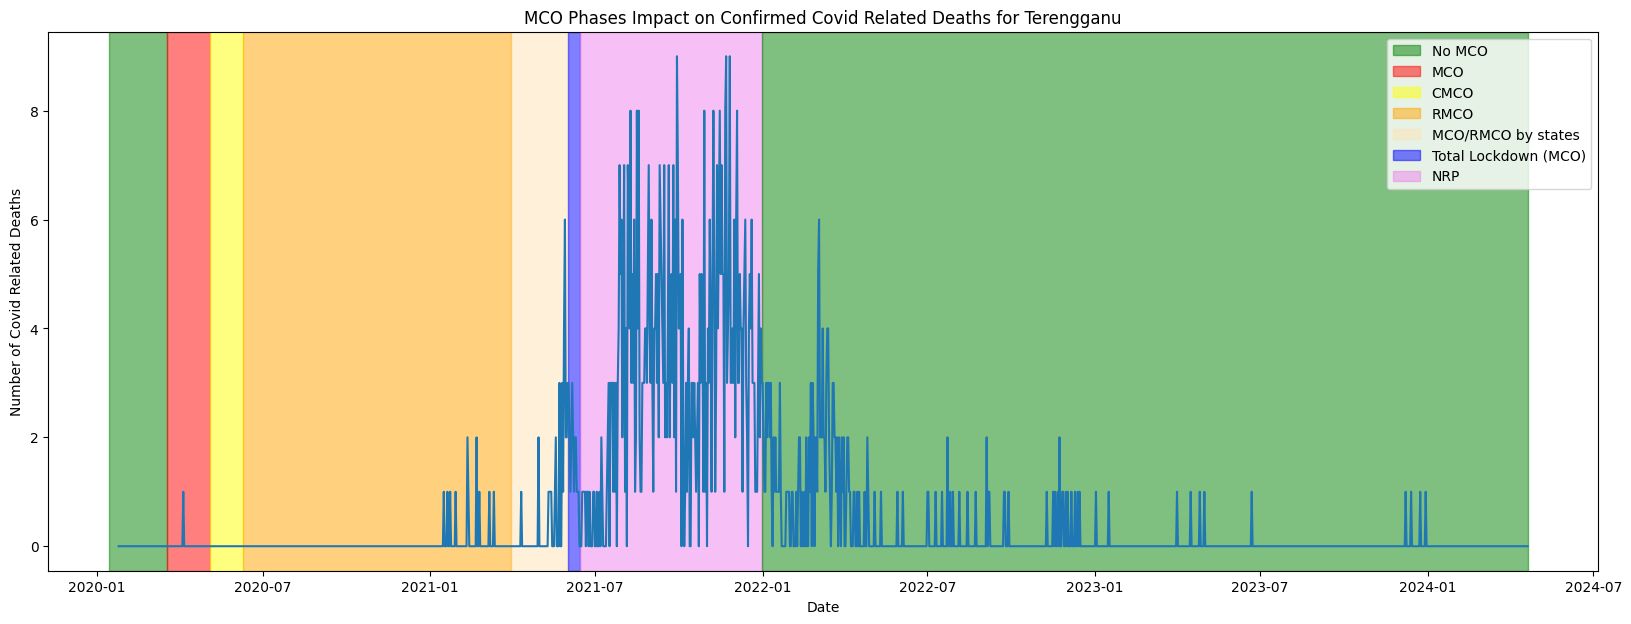

In [54]:
df_terengganu = df_state[df_state["state"] == "Terengganu"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Confirmed Covid Related Deaths for Terengganu")
plt.plot(df_terengganu["date"], df_terengganu["deaths_new_dod"])
plt.xlabel("Date")
plt.ylabel("Number of Covid Related Deaths")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

In [ ]:
df_johor = df_state[df_state["state"] == "Johor"]
df_kedah = df_state[df_state["state"] == "Kedah"]
df_kelantan = df_state[df_state["state"] == "Kelantan"]
df_melaka = df_state[df_state["state"] == "Melaka"]
df_NS = df_state[df_state["state"] == "Negeri Sembilan"]
df_pahang = df_state[df_state["state"] == "Pahang"]
df_perak = df_state[df_state["state"] == "Perak"]
df_perlis = df_state[df_state["state"] == "Perlis"]
df_PP = df_state[df_state["state"] == "Pulau Pinang"]
df_sabah = df_state[df_state["state"] == "Sabah"]
df_sarawak = df_state[df_state["state"] == "Sarawak"]
df_selangor = df_state[df_state["state"] == "Selangor"]
df_terengganu = df_state[df_state["state"] == "Terengganu"]


plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Confirmed Covid Related Deaths by state")

plt.plot(df_johor["date"], df_johor["deaths_new_dod"], label="Johor")
plt.plot(df_kedah["date"], df_kedah["deaths_new_dod"], label="Kedah")
plt.plot(df_kelantan["date"], df_kelantan["deaths_new_dod"], label="Kelantan")
plt.plot(df_melaka["date"], df_melaka["deaths_new_dod"], label="Melaka")
plt.plot(df_NS["date"], df_NS["deaths_new_dod"], label="Negeri Sembilan")
plt.plot(df_pahang["date"], df_pahang["deaths_new_dod"], label="Pahang")
plt.plot(df_perak["date"], df_perak["deaths_new_dod"], label="Perak")
plt.plot(df_perlis["date"], df_perlis["deaths_new_dod"], label="Perlis")
plt.plot(df_PP["date"], df_PP["deaths_new_dod"], label="Pulau Pinang")
plt.plot(df_sabah["date"], df_sabah["deaths_new_dod"], label="Sabah")
plt.plot(df_sarawak["date"], df_sarawak["deaths_new_dod"], label="Sarawak")
plt.plot(df_selangor["date"], df_selangor["deaths_new_dod"], label="Selangor")
plt.plot(df_terengganu["date"], df_terengganu["deaths_new_dod"], label="Terengganu")

plt.xlabel("Date")
plt.ylabel("Number of New Cases")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()